# Introduction to Data Visualization

#### 01 customizing plots
line plots, histograms,scatter plots,plotting multiple graphs (plt.axes()) plt.subplot()
limiting plots: plt.xlim(), plt.ylim(), plt.axis()
legends annotation, annotation arrows (annotate(arrowprops={})), annotation text (annotate())
working with plot style. plt.style.available  plt.style.use('ggplot')

#### 02 plotting 2D arrays
meshgrid(), sampling on a grid, visualizing bivariate functions,colormaps,contour plots filled and unfilled,histograms in 1D, hist2d,hexagonal binning (hexbin()), working with images:read image, plot, change intensity, colorbar, rescaling

#### 03 statistical plots with seaborn (import seaborn as sns)
linear regression plots (sns.lmplot()),grouping factors on same plot with hue='', residual plots (sns.residplot()), 
bivariate distribution plots: sns.stripplot(), sns.swarmplot(),sns.boxplot,
sns.violinplot()
multivariate distributions: sns.jointplot(),sns.pairplot(), covariance plots with heat maps sns.heatmap(covariance)

#### 04 analyzing time series and images
slicing and plotting time series, selecting and formatting dates,rotation of axis labels,time series with moving windows,
moving window calculations(averages,medians,standard deviations),histogram equalization in images


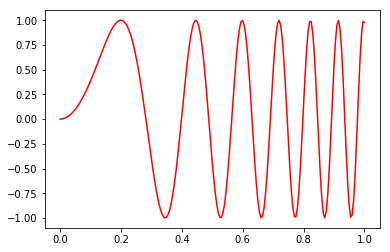

In [2]:
#reminder line plots
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,1,201)
y = np.sin((2*np.pi*x)**2)
plt.plot(x,y,'red')
plt.show()

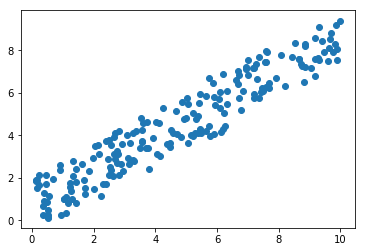

In [3]:
#reminder scatter plots
import numpy as np
import matplotlib.pyplot as plt
x = 10*np.random.rand(200,1)
y = (0.2+0.8*x)+np.sin((2*np.pi*x)**2)+np.random.rand(200,1)
plt.scatter(x,y)
plt.show()

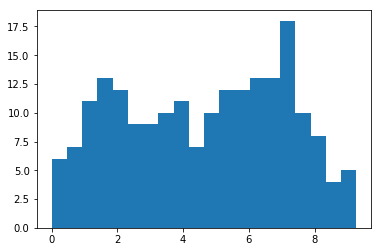

In [2]:
#reminder histograms

import numpy as np
import matplotlib.pyplot as plt
x = 10*np.random.rand(200,1)
y = (0.2+0.8*x)+np.sin((2*np.pi*x)**2)+np.random.rand(200,1)
plt.hist(y, bins=20)
plt.show()

### Plotting muliple graphs

plotting many graphs on commong axes
creating axes withing a figure
creating subplots within a figure

In [1]:
import pandas as pd
t = pd.read_csv('weather_csv.csv')

#graphs on commong axes
import matplotlib.pyplot as plt
plt.plot('tmax','red', data=t)
plt.plot('tmin','blue', data=t)  #apperers on samme axes
plt.xlabel('temperature')
plt.title('tmax and tmin')
plt.show()

<Figure size 640x480 with 1 Axes>

#### the axes command
syntax: axes([x_lo,y_lo,width,height)
units between 0 and 1 (figure dimension)

0.7 units X 0.5 units

Text(0.5, 1.0, 'temperatures2')

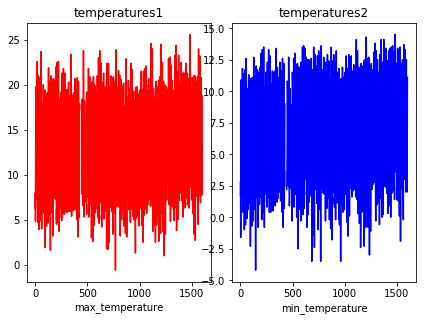

In [11]:
#using axes
plt.axes([0.05,0.05,0.425,0.9])
plt.plot('tmax','red', data=t)
plt.xlabel('max_temperature')
plt.title('temperatures1')
#using axes
plt.axes([0.525,0.05,0.425,0.9])
plt.plot('tmin','blue', data=t)
plt.xlabel('min_temperature')
plt.title('temperatures2')

#### the subplot() command
syntax: subplot(nrows,ncols,nsubplot)
subplot ordering: row-wise from top left, indexed from 1

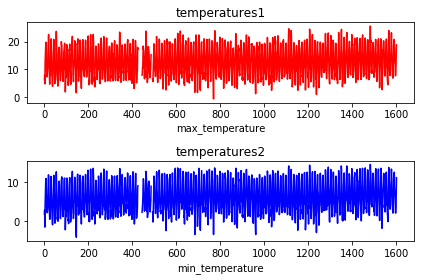

In [12]:
#using subplot()
plt.subplot(2,1,1)  #1
plt.plot('tmax','red', data=t)
plt.xlabel('max_temperature')
plt.title('temperatures1')
#using subplot
plt.subplot(2,1,2)  #2
plt.plot('tmin','blue', data=t)
plt.xlabel('min_temperature')
plt.title('temperatures2')

plt.tight_layout()
plt.show()

#### customizing axes
axis([xmin,xmax,ymin,ymax]) sets axis extents
control over individual axis extents
xlim([xmin,ymax]) ylim([ymin,ymax])

can use tuple,lists for extents
xlim((-2,3)) works
xlim([-2,3]) works also

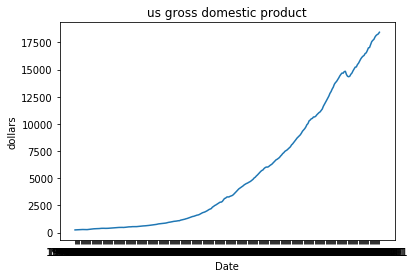

In [18]:
gdp_df = pd.read_csv('GDP_USA.csv') 
import matplotlib.pyplot as plt
plt.plot('DATE','VALUE', data=gdp_df)
plt.xlabel('Date')
plt.ylabel('dollars')
plt.title('us gross domestic product')
plt.show()

In [19]:
gdp_df.head(7)

DATE  VALUE
0  1947-01-01  243.1
1  1947-04-01  246.3
2  1947-07-01  250.1
3  1947-10-01  260.3
4  1948-01-01  266.2
5  1948-04-01  272.9
6  1948-07-01  279.5

In [20]:
gdp_df = pd.read_csv('GDP_USA.csv', parse_dates=True, index_col='DATE') 
gdp_df.head(3)

VALUE
DATE             
1947-01-01  243.1
1947-04-01  246.3
1947-07-01  250.1

In [21]:
#resample data to annual
gdp_df2=gdp_df.resample('A').mean()
gdp_df2.head(10)

VALUE
DATE               
1947-12-31  249.950
1948-12-31  274.825
1949-12-31  272.850
1950-12-31  300.175
1951-12-31  347.325
1952-12-31  367.725
1953-12-31  389.750
1954-12-31  391.125
1955-12-31  426.175
1956-12-31  450.150

In [22]:
#add new dummy column to remove index from DATE, otherwise cant plot it
gdp_df2['new_col'] = range(1, len(gdp_df2) + 1)

gdp_df2 = gdp_df2.reset_index()
gdp_df2.head(2)

DATE    VALUE  new_col
0 1947-12-31  249.950        1
1 1948-12-31  274.825        2

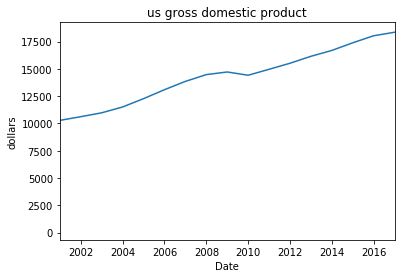

In [23]:
#using xlim()

plt.plot('DATE','VALUE', data=gdp_df2)
plt.xlabel('Date')
plt.ylabel('dollars')
plt.title('us gross domestic product')
plt.xlim(('2000-12-31','2016-12-31'))
plt.show()

In [24]:
gdp_df2['year']=gdp_df2['DATE'].map(lambda x: x.year)
gdp_df2.head(3)

DATE    VALUE  new_col  year
0 1947-12-31  249.950        1  1947
1 1948-12-31  274.825        2  1948
2 1949-12-31  272.850        3  1949

In [25]:
gdp_df2.tail(3)

DATE     VALUE  new_col  year
67 2014-12-31  17393.10       68  2014
68 2015-12-31  18036.65       69  2015
69 2016-12-31  18359.05       70  2016

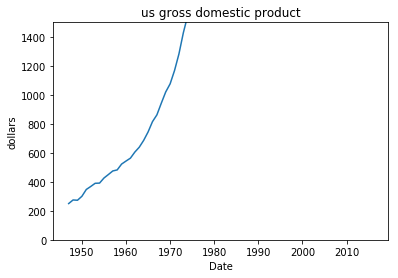

In [26]:
#using xlim() and ylim()
plt.plot('year','VALUE', data=gdp_df2)
plt.xlabel('Date')
plt.ylabel('dollars')
plt.title('us gross domestic product')
#plt.xlim(('1948-12-31','2016-12-31'))
plt.ylim((0,1500))
plt.show()

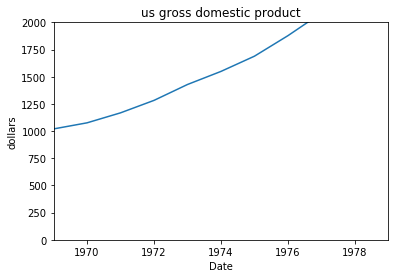

In [27]:
#using axis
plt.plot('year','VALUE', data=gdp_df2)
plt.xlabel('Date')
plt.ylabel('dollars')
plt.title('us gross domestic product')
plt.axis((1969,1979,0,2000))
plt.show()

#### other axis() options:
axis('off') turns off axis lines and labels
axis('equal') equal scaling on x,y,axes
axis('square') forces square plot
axis('tight') sets xlim(),ylim() to show all data

### Legends, annotations and styles

In [35]:
iris = pd.read_csv('iris.csv')
iris.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

  species  
0  setosa  
1  setosa  
2  setosa

In [42]:
setosa = iris.loc[iris['species'].isin(['setosa'])]
setosa.tail(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
47                4.6               3.2                1.4               0.2   
48                5.3               3.7                1.5               0.2   
49                5.0               3.3                1.4               0.2   

   species  
47  setosa  
48  setosa  
49  setosa

In [43]:
versicolor = iris.loc[iris['species'].isin(['versicolor'])]
virginica = iris.loc[iris['species'].isin(['virginica'])]

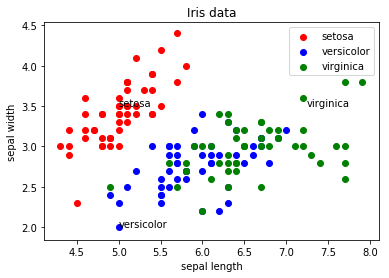

In [46]:
plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='red',
            label='setosa', data=setosa)


plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='blue',
            label='versicolor', data=versicolor)

plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='green',
            label='virginica', data=virginica)


#using legend
plt.legend(loc='upper right')
plt.title('Iris data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

#annotate() for text  
plt.annotate('setosa', xy=(5.0,3.5))  #xy - coordinates to annotate
plt.annotate('virginica', xy=(7.25,3.5))
plt.annotate('versicolor', xy=(5.0,2.0))


plt.show()

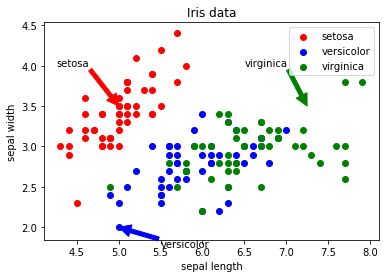

In [49]:
plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='red',
            label='setosa', data=setosa)


plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='blue',
            label='versicolor', data=versicolor)

plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='green',
            label='virginica', data=virginica)


#using legend
plt.legend(loc='upper right')
plt.title('Iris data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

#annotate for arrows
plt.annotate('setosa', xy=(5.0,3.5),
            xytext=(4.25,4.0), arrowprops={'color':'red'})  
plt.annotate('virginica', xy=(7.25,3.5),
            xytext=(6.5,4.0), arrowprops={'color':'green'}) 
plt.annotate('versicolor', xy=(5.0,2.0),
            xytext=(5.5,1.75), arrowprops={'color':'blue'}) 
plt.show()

### Working with plot styles
style sheets in matplotlib
default for lines,points,backgrounds
switch styles globally with plt.style.use()

In [50]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

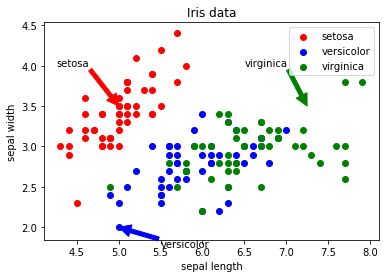

In [51]:
plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='red',
            label='setosa', data=setosa)


plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='blue',
            label='versicolor', data=versicolor)

plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='green',
            label='virginica', data=virginica)


#using legend
plt.legend(loc='upper right')
plt.title('Iris data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

#annotate for arrows
plt.annotate('setosa', xy=(5.0,3.5),
            xytext=(4.25,4.0), arrowprops={'color':'red'})  
plt.annotate('virginica', xy=(7.25,3.5),
            xytext=(6.5,4.0), arrowprops={'color':'green'}) 
plt.annotate('versicolor', xy=(5.0,2.0),
            xytext=(5.5,1.75), arrowprops={'color':'blue'}) 

#style
plt.style.use('ggplot')
plt.show()

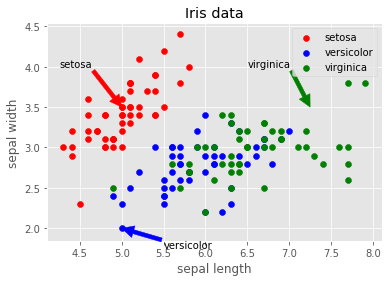

In [52]:
plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='red',
            label='setosa', data=setosa)


plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='blue',
            label='versicolor', data=versicolor)

plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='green',
            label='virginica', data=virginica)


#using legend
plt.legend(loc='upper right')
plt.title('Iris data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

#annotate for arrows
plt.annotate('setosa', xy=(5.0,3.5),
            xytext=(4.25,4.0), arrowprops={'color':'red'})  
plt.annotate('virginica', xy=(7.25,3.5),
            xytext=(6.5,4.0), arrowprops={'color':'green'}) 
plt.annotate('versicolor', xy=(5.0,2.0),
            xytext=(5.5,1.75), arrowprops={'color':'blue'}) 

#style
plt.style.use('seaborn-bright')
plt.show()

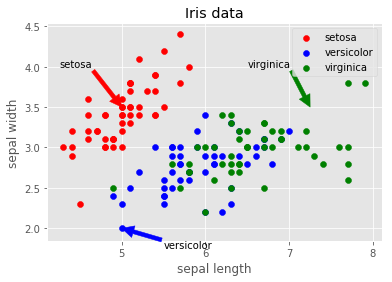

In [53]:
# fivethirtyeight style
plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='red',
            label='setosa', data=setosa)


plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='blue',
            label='versicolor', data=versicolor)

plt.scatter('sepal length (cm)', 'sepal width (cm)', marker='o', color='green',
            label='virginica', data=virginica)


#using legend
plt.legend(loc='upper right')
plt.title('Iris data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

#annotate for arrows
plt.annotate('setosa', xy=(5.0,3.5),
            xytext=(4.25,4.0), arrowprops={'color':'red'})  
plt.annotate('virginica', xy=(7.25,3.5),
            xytext=(6.5,4.0), arrowprops={'color':'green'}) 
plt.annotate('versicolor', xy=(5.0,2.0),
            xytext=(5.5,1.75), arrowprops={'color':'blue'}) 

#style
plt.style.use('fivethirtyeight')
plt.show()

### Exerices

In [ ]:
'''
Multiple plots on single axis
It is time now to put together some of what you have learned and combine line plots on a common set of axes. The data set here comes from records of undergraduate degrees awarded to women in a variety of fields from 1970 to 2011. You can compare trends in degrees most easily by viewing two curves on the same set of axes.
Here, three NumPy arrays have been pre-loaded for you: year (enumerating years from 1970 to 2011 inclusive), physical_sciences (representing the percentage of Physical Sciences degrees awarded to women each in corresponding year), and computer_science (representing the percentage of Computer Science degrees awarded to women in each corresponding year).
You will issue two plt.plot() commands to draw line plots of different colors on the same set of axes. Here, year represents the x-axis, while physical_sciences and computer_science are the y-axes.
INSTRUCTIONS
100XP
Import matplotlib.pyplot as its usual alias.
Add a 'blue' line plot of the % of degrees awarded to women in the Physical Sciences (physical_sciences) from 1970 to 2011 (year). Note that the x-axis should be specified first.
Add a 'red' line plot of the % of degrees awarded to women in Computer Science (computer_science) from 1970 to 2011 (year).
Use plt.show() to display the figure with the curves on the same axes.
'''
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, c='blue')

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, c='red')

# Display the plot
plt.show()

In [ ]:
'''
Using axes()
Rather than overlaying line plots on common axes, you may prefer to plot different line plots on distinct axes. The command plt.axes() is one way to do this (but it requires specifying coordinates relative to the size of the figure).
Here, you have the same three arrays year, physical_sciences, and computer_science representing percentages of degrees awarded to women over a range of years. You will use plt.axes() to create separate sets of axes in which you will draw each line plot.
In calling plt.axes([xlo, ylo, width, height]), a set of axes is created and made active with lower corner at coordinates (xlo, ylo) of the specified width and height. Note that these coordinates can be passed to plt.axes() in the form of a list or a tuple.
The coordinates and lengths are values between 0 and 1 representing lengths relative to the dimensions of the figure. After issuing a plt.axes() command, plots generated are put in that set of axes.
INSTRUCTIONS
100XP
Create a set of plot axes with lower corner xlo and ylo of 0.05 and 0.05, width of 0.425, and height of 0.9 (in units relative to the figure dimension).
Note: Remember to pass these coordinates to plt.axes() in the form of a list: [xlo, ylo, width, height].
Plot the percentage of degrees awarded to women in Physical Sciences in blue in the active axes just created.
Create a set of plot axes with lower corner xlo and ylo of 0.525 and 0.05, width of 0.425, and height of 0.9 (in units relative to the figure dimension).
Plot the percentage of degrees awarded to women in Computer Science in red in the active axes just created.
'''
# Create plot axes for the first line plot
plt.axes([0.05, .05, 0.425, 0.9])

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')

# Create plot axes for the second line plot
plt.axes([0.525, .05, 0.425, 0.9])

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')

# Display the plot
plt.show()

In [ ]:
'''
Using subplot() (1)
The command plt.axes() requires a lot of effort to use well because the coordinates of the axes need to be set manually. A better alternative is to use plt.subplot() to determine the layout automatically.
In this exercise, you will continue working with the same arrays from the previous exercises: year, physical_sciences, and computer_science. Rather than using plt.axes() to explicitly lay out the axes, you will use plt.subplot(m, n, k) to make the subplot grid of dimensions m by n and to make the kth subplot active (subplots are numbered starting from 1 row-wise from the top left corner of the subplot grid).
INSTRUCTIONS
100XP
Use plt.subplot() to create a figure with 1x2 subplot layout & make the first subplot active.
Plot the percentage of degrees awarded to women in Physical Sciences in blue in the active subplot.
Use plt.subplot() again to make the second subplot active in the current 1x2 subplot grid.
Plot the percentage of degrees awarded to women in Computer Science in red in the active subplot.
'''
# Create a figure with 1x2 subplot and make the left subplot active
plt.subplot(1,2,1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the right subplot active in the current 1x2 subplot grid
plt.subplot(1,2,2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()
plt.show()

In [ ]:
'''
Using subplot() (2)
Now you have some familiarity with plt.subplot(), you can use it to plot more plots in larger grids of subplots of the same figure.
Here, you will make a 2×2
2
×
2
 grid of subplots and plot the percentage of degrees awarded to women in Physical Sciences (using physical_sciences), in Computer Science (using computer_science), in Health Professions (using health), and in Education (using education).
INSTRUCTIONS
100XP
Create a figure with 2×2
2
×
2
 subplot layout, make the top, left subplot active, and plot the % of degrees awarded to women in Physical Sciences in blue in the active subplot.
Make the top, right subplot active in the current 2×2
2
×
2
subplot grid and plot the % of degrees awarded to women in Computer Science in red in the active subplot.
Make the bottom, left subplot active in the current 2×2
2
×
2
subplot grid and plot the % of degrees awarded to women in Health Professions in green in the active subplot.
Make the bottom, right subplot active in the current 2×2
2
×
2
subplot grid and plot the % of degrees awarded to women in Education in yellow in the active subplot.
'''
# Create a figure with 2x2 subplot layout and make the top left subplot active
plt.subplot(2,2,1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the top right subplot active in the current 2x2 subplot grid 
plt.subplot(2,2,2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Make the bottom left subplot active in the current 2x2 subplot grid
plt.subplot(2,2,3)

# Plot in green the % of degrees awarded to women in Health Professions
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Make the bottom right subplot active in the current 2x2 subplot grid
plt.subplot(2,2,4)

# Plot in yellow the % of degrees awarded to women in Education
plt.plot(year, education, color='yellow')
plt.title('Education')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()

In [ ]:
'''
Using xlim(), ylim()
In this exercise, you will work with the matplotlib.pyplot interface to quickly set the x- and y-limits of your plots.
You will now create the same figure as in the previous exercise using plt.plot(), this time setting the axis extents using plt.xlim() and plt.ylim(). These commands allow you to either zoom or expand the plot or to set the axis ranges to include important values (such as the origin).
In this exercise, as before, the percentage of women graduates in Computer Science and in the Physical Sciences are held in the variables computer_science and physical_sciences respectively over year.
After creating the plot, you will use plt.savefig() to export the image produced to a file.
INSTRUCTIONS
100XP
Use plt.xlim() to set the x-axis range to the period between the years 1990 and 2010.
Use plt.ylim() to set the y-axis range to the interval between 0% and 50% of degrees awarded.
Display the final figure with plt.show() and save the output to 'xlim_and_ylim.png'.
'''
# Plot the % of degrees awarded to women in Computer Science and the Physical Sciences
plt.plot(year,computer_science, color='red') 
plt.plot(year, physical_sciences, color='blue')

# Add the axis labels
plt.xlabel('Year')
plt.ylabel('Degrees awarded to women (%)')

# Set the x-axis range
plt.xlim(1990, 2010)

# Set the y-axis range
plt.ylim(0, 50)

# Add a title and display the plot
plt.title('Degrees awarded to women (1990-2010)\nComputer Science (red)\nPhysical Sciences (blue)')
plt.show()

# Save the image as 'xlim_and_ylim.png'
plt.savefig('xlim_and_ylim.png')

In [ ]:
'''
Using axis()
Using plt.xlim() and plt.ylim() are useful for setting the axis limits individually. In this exercise, you will see how you can pass a 4-tuple to plt.axis() to set limits for both axes at once. For example, plt.axis((1980,1990,0,75)) would set the extent of the x-axis to the period between 1980 and 1990, and would set the y-axis extent from 0 to 75% degrees award.
Once again, the percentage of women graduates in Computer Science and in the Physical Sciences are held in the variables computer_science and physical_sciences where each value was measured at the corresponding year held in the year variable.
INSTRUCTIONS
100XP
Use plt.axis() to select the time period between 1990 and 2010 on the x-axis as well as the interval between 0 and 50% awarded on the y-axis.
Save the resulting plot as 'axis_limits.png'.
'''
# Plot in blue the % of degrees awarded to women in Computer Science
plt.plot(year,computer_science, color='blue')

# Plot in red the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences,color='red')

# Set the x-axis and y-axis limits
plt.axis((1990, 2010, 0, 50))

# Show the figure
plt.show()

# Save the figure as 'axis_limits.png'
plt.savefig('axis_limits.png')

In [ ]:
'''
Using legend()
Legends are useful for distinguishing between multiple datasets displayed on common axes. The relevant data are created using specific line colors or markers in various plot commands. Using the keyword argument label in the plotting function associates a string to use in a legend.
For example, here, you will plot enrollment of women in the Physical Sciences and in Computer Science over time. You can label each curve by passing a label argument to the plotting call, and request a legend using plt.legend(). Specifying the keyword argument loc determines where the legend will be placed.
INSTRUCTIONS
100XP
Modify the plot command provided that draws the enrollment of women in Computer Science over time so that the curve is labelled 'Computer Science' in the legend.
Modify the plot command provided that draws the enrollment of women in the Physical Sciences over time so that the curve is labelled 'Physical Sciences' in the legend.
Add a legend at the lower center (i.e., loc='lower center').
'''
# Specify the label 'Computer Science'
plt.plot(year, computer_science, color='red', label='Computer Science') 

# Specify the label 'Physical Sciences' 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')

# Add a legend at the lower center
plt.legend(loc='lower center')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()

In [ ]:
'''
Using annotate()
It is often useful to annotate a simple plot to provide context. This makes the plot more readable and can highlight specific aspects of the data. Annotations like text and arrows can be used to emphasize specific observations.
Here, you will once again plot enrollment of women in the Physical Sciences and Computer science over time. The legend is set up as before. Additionally, you will mark the inflection point when enrollment of women in Computer Science reached a peak and started declining using plt.annotate().
To enable an arrow, set arrowprops=dict(facecolor='black'). The arrow will point to the location given by xy and the text will appear at the location given by xytext.
INSTRUCTIONS
100XP
Compute the maximum enrollment of women in Computer Science using the .max() method.
Calculate the year in which there was maximum enrollment of women in Computer Science using the .argmax() method.
Annotate the plot with an arrow at the point of peak women enrolling in Computer Science.
Label the arrow 'Maximum'. The parameter for this is s, but you don't have to specify it.
Pass in the arguments to xy and xytext as tuples.
For xy, use the yr_max and cs_max that you computed.
For xytext, use (yr_max+5, cs_max+5) to specify the displacement of the label from the tip of the arrow.
Draw the arrow by specifying the keyword argument arrowprops=dict(facecolor='black'). The single letter shortcut for 'black' is 'k'.
'''
# Plot with legend as before
plt.plot(year, computer_science, color='red', label='Computer Science') 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')
plt.legend(loc='lower right')

# Compute the maximum enrollment of women in Computer Science: cs_max
cs_max = computer_science.max()

# Calculate the year in which there was maximum enrollment of women in Computer Science: yr_max
yr_max = year[computer_science.argmax()]

# Add a black arrow annotation
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max+5, cs_max+5), arrowprops=dict(facecolor='black'))

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()

In [ ]:
'''
Modifying styles
Matplotlib comes with a number of different stylesheets to customize the overall look of different plots. To activate a particular stylesheet you can simply call plt.style.use() with the name of the style sheet you want. To list all the available style sheets you can execute: print(plt.style.available).
INSTRUCTIONS
100XP
Import matplotlib.pyplot as its usual alias.
Activate the 'ggplot' style sheet with plt.style.use().
'''
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set the style to 'ggplot'
plt.style.use('ggplot')

# Create a figure with 2x2 subplot layout
plt.subplot(2, 2, 1) 

# Plot the enrollment % of women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Plot the enrollment % of women in Computer Science
plt.subplot(2, 2, 2)
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Add annotation
cs_max = computer_science.max()
yr_max = year[computer_science.argmax()]
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max-1, cs_max-10), arrowprops=dict(facecolor='black'))

# Plot the enrollmment % of women in Health professions
plt.subplot(2, 2, 3)
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Plot the enrollment % of women in Education
plt.subplot(2, 2, 4)
plt.plot(year, education, color='yellow')
plt.title('Education')

# Improve spacing between subplots and display them
plt.tight_layout()
plt.show()

## Plotting 2D arrays

reminder: NumPy arrays:
homogeneous in type
calculations all at once
indexing with brackets

reminder: slicing arrays
slicing 1D: A[slice], 2d array: A[slice0,slice1]
slicing slice=start: stop:stride



In [54]:
#using meshgrid
import numpy as np
u = np.linspace(-2,2,3)
v = np.linspace(-1,1,5)
X,Y = np.meshgrid(u,v)


In [55]:
print(X)

[[-2.  0.  2.]
 [-2.  0.  2.]
 [-2.  0.  2.]
 [-2.  0.  2.]
 [-2.  0.  2.]]


In [56]:
print(Y)

[[-1.  -1.  -1. ]
 [-0.5 -0.5 -0.5]
 [ 0.   0.   0. ]
 [ 0.5  0.5  0.5]
 [ 1.   1.   1. ]]


In [57]:
Z = X**2/25 + Y**2/4
print(Z)

[[0.41   0.25   0.41  ]
 [0.2225 0.0625 0.2225]
 [0.16   0.     0.16  ]
 [0.2225 0.0625 0.2225]
 [0.41   0.25   0.41  ]]


#### Sampling on grid
f(x,y)=x^2/25 + y^2/4

Z:
 [[0.41   0.25   0.41  ]
 [0.2225 0.0625 0.2225]
 [0.16   0.     0.16  ]
 [0.2225 0.0625 0.2225]
 [0.41   0.25   0.41  ]]


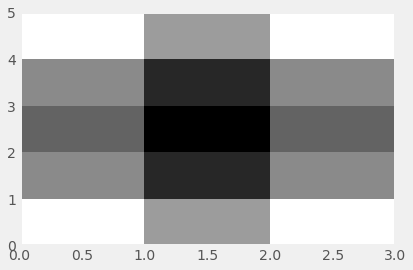

In [58]:
print('Z:\n',Z)
plt.set_cmap('gray')
plt.pcolor(Z)
plt.show()

### visualiazing bivariate functions
f(x,y)=x^2/25 + y^2/4

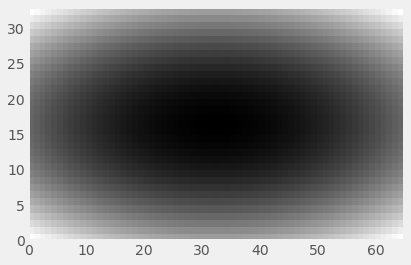

In [59]:
import numpy as np
u = np.linspace(-2,2,65)
v = np.linspace(-1,1,33)
X,Y = np.meshgrid(u,v)
Z = X**2/25 + Y**2/4
plt.pcolor(Z)
plt.show()

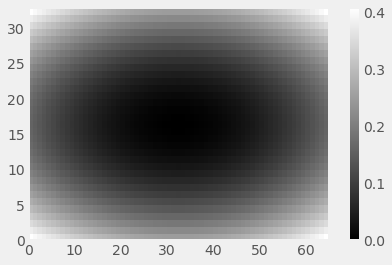

In [61]:
plt.pcolor(Z, cmap='gray')
plt.colorbar()  #plot color bar on the side
plt.show()

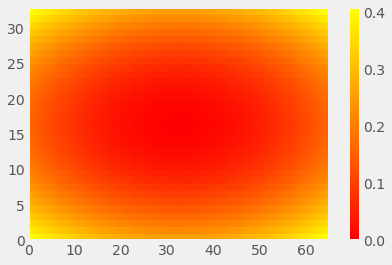

In [62]:
plt.pcolor(Z, cmap='autumn')
plt.colorbar()
plt.show()

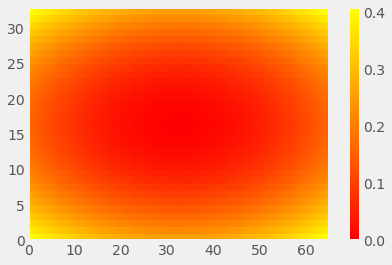

In [63]:
# Axis tight
plt.pcolor(Z, cmap='autumn')
plt.colorbar()
plt.axis('tight')
plt.show()

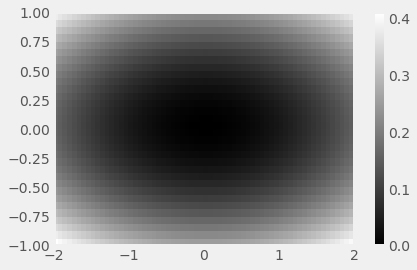

In [64]:
#plot using mesh
#axis determined by mesh grid arrays X and Y
plt.pcolor(X,Y,Z)  #X,Y are 2d meshgrid
plt.colorbar()
plt.axis('tight')
plt.show()

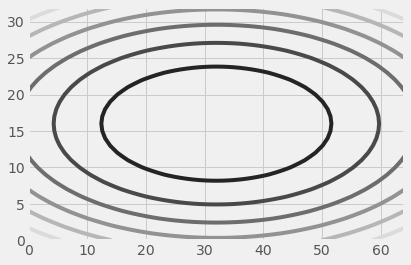

In [65]:
#contour plots
plt.contour(Z)
plt.show()

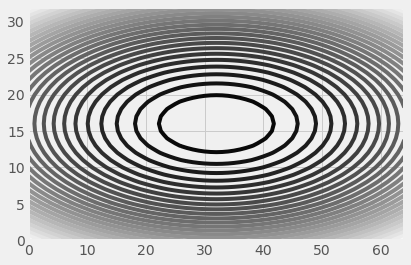

In [66]:
#more contours
plt.contour(Z,30)
plt.show()

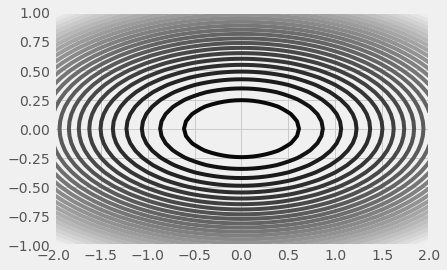

In [67]:
#contour plots using meshgrid
plt.contour(X,Y,Z,30)
plt.show()

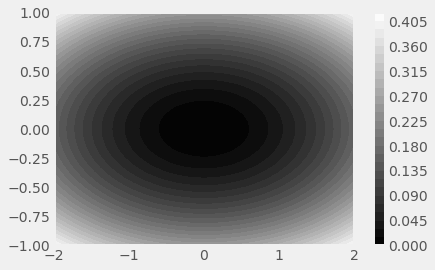

In [68]:
#filled controu plots
plt.contourf(X,Y,Z,30)   #contourf
plt.colorbar()
plt.show()

### visualizing bivariate distributions

In [ ]:
#histograms in 1D
counts,bins,patches = plt.hist(x, bins=25)
plt.show()

In [ ]:
#bins in 2D
#different shapes available fir binning points
#common choices rectangles and hexagons
#rectangular bining
plt.hist2d(x,y,bins=(10,20)) #x and y are 1D arrays of same length
plt.colorbar()
plt.xlabel('dgfdg')
plt.ylabel('jhih')
plt.show()

In [ ]:
#hexagonal binning
#hexbin()
#bins in 2D
#different shapes available fir binning points
#common choices rectangles and hexagons
#rectangular bining
plt.hexbin(x,y,gridsize=(10,20)) #x and y are 1D arrays of same length
plt.colorbar()
plt.xlabel('dgfdg')
plt.ylabel('jhih')
plt.show()

In [ ]:
## Working with images

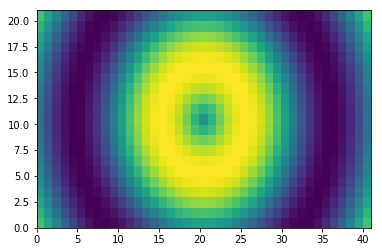

<Figure size 432x288 with 0 Axes>

In [2]:
'''
Generating meshes
In order to visualize two-dimensional arrays of data, it is necessary to understand how to
generate and manipulate 2-D arrays. Many Matplotlib plots support arrays as input and in
particular, they support NumPy arrays. The NumPy library is the most widely-supported means 
for supporting numeric arrays in Python.
In this exercise, you will use the meshgrid function in NumPy to generate 2-D arrays which
you will then visualize using plt.imshow(). The simplest way to generate a meshgrid is 
as follows:
import numpy as np
Y,X = np.meshgrid(range(10),range(20))
This will create two arrays with a shape of (20,10), which corresponds to 20 rows along
the Y-axis and 10 columns along the X-axis. In this exercise, you will use np.meshgrid()
to generate a regular 2-D sampling of a mathematical function.

Import the numpy and matplotlib.pyplot modules using the respective aliases np and plt.
Generate two one-dimensional arrays u and v using np.linspace(). The array u should contain 
41 values uniformly spaced beween -2 and +2. The array v should contain 21 values uniformly 
spaced between -1 and +1.
Construct two two-dimensional arrays X and Y from u and v using np.meshgrid(). The resulting 
arrays should have shape (41,21).
After the array Z is computed using X and Y, visualize the array Z using plt.pcolor() 
and plt.show().
Save the resulting figure as 'sine_mesh.png'.
'''
# Import numpy and matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

# Generate two 1-D arrays: u, v
u = np.linspace(-2, 2, 41)
v = np.linspace(-1, 1, 21)

# Generate 2-D arrays from u and v: X, Y
X,Y = np.meshgrid(u, v)

# Compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 

# Display the resulting image with pcolor()
plt.pcolor(Z)
plt.show()

# Save the figure to 'sine_mesh.png'
plt.savefig('sine_mesh.png')

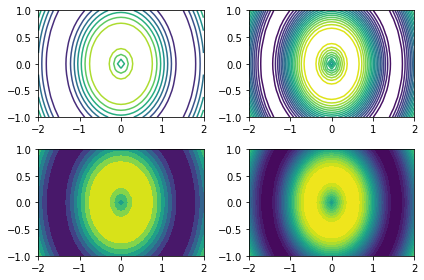

In [3]:
'''
Contour & filled contour plots
Although plt.imshow() or plt.pcolor() are often used to visualize a 2-D array in entirety,
there are other ways of visualizing such data without displaying all the available sample 
values. One option is to use the array to compute contours that are visualized instead.
Two types of contour plot supported by Matplotlib are plt.contour() and plt.contourf() 
where the former displays the contours as lines and the latter displayed filled areas 
between contours. Both these plotting commands accept a two dimensional array from 
which the appropriate contours are computed.
In this exercise, you will visualize a 2-D array repeatedly using both plt.contour() 
and plt.contourf(). You will use plt.subplot() to display several contour plots in a 
common figure, using the meshgrid X, Y as the axes. For example, plt.contour(X, Y, Z) 
generates a default contour map of the array Z.

INSTRUCTIONS
Using the meshgrid X, Y as axes:
Generate a default contour plot of the array Z in the upper left subplot.
Generate a contour plot of the array Z in the upper right subplot with 20 contours.
Generate a default filled contour plot of the array Z in the lower left subplot.
Generate a default filled contour plot of the array Z in the lower right subplot with 
20 contours.
Improve the spacing between the subplots with plt.tight_layout() and display the figure.
'''
# Generate a default contour map of the array Z
plt.subplot(2,2,1)
plt.contour(X, Y, Z)

# Generate a contour map with 20 contours
plt.subplot(2,2,2)
plt.contour(X, Y, Z, 20)

# Generate a default filled contour map of the array Z
plt.subplot(2,2,3)
plt.contourf(X, Y, Z)

# Generate a default filled contour map with 20 contours
plt.subplot(2,2,4)
plt.contourf(X, Y, Z, 20)

# Improve the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

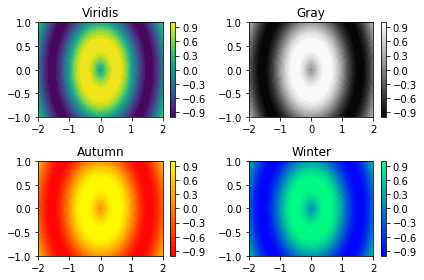

In [4]:
'''
Modifying colormaps
When displaying a 2-D array with plt.imshow() or plt.pcolor(), the values of the array 
are mapped to a corresponding color. The set of colors used is determined by a colormap 
which smoothly maps values to colors, making it easy to understand the structure of the data 
at a glance.
It is often useful to change the colormap from the default 'jet' colormap used by matplotlib.
A good colormap is visually pleasing and conveys the structure of the data faithfully and 
in a way that makes sense for the application.
Some matplotlib colormaps have unique names such as 'jet', 'coolwarm', 'magma' and 'viridis'.
Others have a naming scheme based on overall color such as 'Greens', 'Blues', 'Reds', and 
'Purples'.
Another four colormaps are based on the seasons, namely 'summer', 'autumn', 'winter' and
'spring'.
You can insert the option cmap=<name> into most matplotlib functions to change the color 
map of the resulting plot.
In this exercise, you will explore four different colormaps together using plt.subplot().
You will use a pregenerated array Z and a meshgrid X, Y to generate the same filled contour 
plot with four different color maps. Be sure to also add a color bar to each filled contour
plot with plt.colorbar().

INSTRUCTIONS
Modify the call to plt.contourf() so the filled contours in the top left subplot use the 
'viridis' colormap.
Modify the call to plt.contourf() so the filled contours in the top right subplot use the
'gray' colormap.
Modify the call to plt.contourf() so the filled contours in the bottom left subplot use the
'autumn' colormap.
Modify the call to plt.contourf() so the filled contours in the bottom right subplot use the
'winter' colormap.
'''
# Create a filled contour plot with a color map of 'viridis'
plt.subplot(2,2,1)
plt.contourf(X,Y,Z,20, cmap='viridis')
plt.colorbar()
plt.title('Viridis')

# Create a filled contour plot with a color map of 'gray'
plt.subplot(2,2,2)
plt.contourf(X,Y,Z,20, cmap='gray')
plt.colorbar()
plt.title('Gray')

# Create a filled contour plot with a color map of 'autumn'
plt.subplot(2,2,3)
plt.contourf(X,Y,Z,20, cmap='autumn')
plt.colorbar()
plt.title('Autumn')

# Create a filled contour plot with a color map of 'winter'
plt.subplot(2,2,4)
plt.contourf(X,Y,Z,20, cmap='winter')
plt.colorbar()
plt.title('Winter')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()

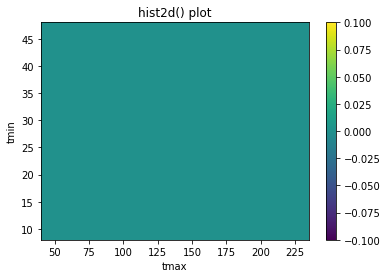

In [3]:
'''
Using hist2d()
Given a set of ordered pairs describing data points, you can count the number of points 
with similar values to construct a two-dimensional histogram. This is similar to 
a one-dimensional histogram, but it describes the joint variation of two random variables 
rather than just one.
In matplotlib, one function to visualize 2-D histograms is plt.hist2d().
You specify the coordinates of the points using plt.hist2d(x,y) assuming x and y are two 
vectors of the same length.
You can specify the number of bins with the argument bins=(nx, ny) where nx is the number 
of bins to use in the horizontal direction and ny is the number of bins to use in the vertical
direction.
You can specify the rectangular region in which the samples are counted in constructing the
2D histogram. The optional parameter required is range=((xmin, xmax), (ymin, ymax)) where
xmin and xmax are the respective lower and upper limits for the variables on the x-axis and
ymin and ymax are the respective lower and upper limits for the variables on the y-axis. 
Notice that the optional range argument can use nested tuples or lists.
In this exercise, you'll use some data from the auto-mpg data set. There are two arrays 
mpg and hp that respectively contain miles per gallon and horse power ratings from over
three hundred automobiles built.
INSTRUCTIONS
100XP
Generate a two-dimensional histogram to view the joint variation of the mpg and hp arrays.
Put hp along the horizontal axis and mpg along the vertical axis.
Specify 20 by 20 rectangular bins with the bins argument.
Specify the region covered with the optional range argument so that the plot samples hp
between 40 and 235 on the x-axis and mpg between 8 and 48 on the y-axis.
Add a color bar to the histogram.
'''
import pandas as pd
import matplotlib.pyplot as plt
t = pd.read_csv('weather_csv.csv')

# Generate a 2-D histogram
plt.hist2d('tmax','tmin', data=t, bins=(20,20), range=((40, 235), (8,48)))

# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('tmax')
plt.ylabel('tmin')
plt.title('hist2d() plot')
plt.show()

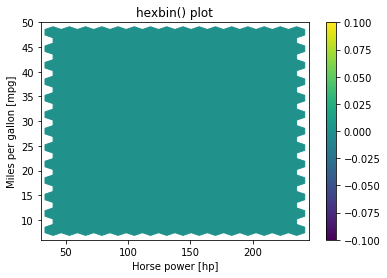

In [8]:
'''
Using hexbin()
The function plt.hist2d() uses rectangular bins to construct a two dimensional histogram.
As an alternative, the function plt.hexbin() uses hexagonal bins. The underlying algorithm 
(based on this article from 1987) constructs a hexagonal tesselation of a planar region
and aggregates points inside hexagonal bins.
The optional gridsize argument (default 100) gives the number of hexagons across the
x-direction used in the hexagonal tiling. If specified as a list or a tuple of length 
two, gridsize fixes the number of hexagon in the x- and y-directions respectively in 
the tiling.
The optional parameter extent=(xmin, xmax, ymin, ymax) specifies rectangular region
covered by the hexagonal tiling. In that case, xmin and xmax are the respective lower
and upper limits for the variables on the x-axis and ymin and ymax are the respective 
lower and upper limits for the variables on the y-axis.
In this exercise, you'll use the same auto-mpg data as in the last exercise (again using
arrays mpg and hp). This time, you'll use plt.hexbin() to visualize the two-dimensional
histogram.
INSTRUCTIONS
100XP
Generate a two-dimensional histogram with plt.hexbin() to view the joint variation 
of the mpg and hp vectors.
Put hp along the horizontal axis and mpg along the vertical axis.
Specify a hexagonal tesselation with 15 hexagons across the x-direction and 12 hexagons
across the y-direction using gridsize.
Specify the rectangular region covered with the optional extent argument: use hp from
40 to 235 and mpg from 8 to 48.
Add a color bar to the histogram.
'''
# Generate a 2d histogram with hexagonal bins
plt.hexbin('tmax','tmin', data=t,gridsize=(15,12),extent=(40, 235, 8, 48))

           
# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hexbin() plot')
plt.show()

(225, 225, 3)


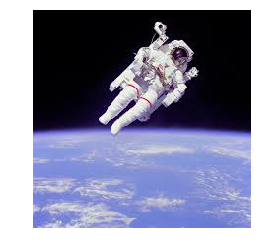

In [9]:
'''
Loading, examining images
Color images such as photographs contain the intensity of the red, green and blue 
color channels.
To read an image from file, use plt.imread() by passing the path to a file, such as a
PNG or JPG file.
The color image can be plotted as usual using plt.imshow().
The resulting image loaded is a NumPy array of three dimensions. The array typically
has dimensions M×N×3
M
×
N
×
3
, where M×N
M
×
N
 is the dimensions of the image. The third dimensions are referred to as color channels
 (typically red, green, and blue).
The color channels can be extracted by Numpy array slicing.
In this exercise, you will load & display an image of an astronaut (by NASA (Public domain),
via Wikimedia Commons). You will also examine its attributes to understand how color images 
are represented.
INSTRUCTIONS
0XP
Load the file '480px-Astronaut-EVA.jpg' into an array.
Print the shape of the img array. How wide and tall do you expect the image to be?
Prepare img for display using plt.imshow().
Turn off the axes using plt.axis('off').
'''
# Load the image into an array: img
img = plt.imread('image.jpg')

# Print the shape of the image
print(img.shape)

# Display the image
plt.imshow(img)

# Hide the axes
plt.axis('off')
plt.show()

(225, 225, 3)
(225, 225)


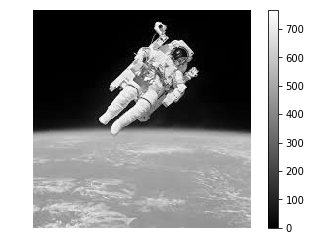

In [10]:
'''
Pseudocolor plot from image data
Image data comes in many forms and it is not always appropriate to display the available
channels in RGB space. In many situations, an image may be processed and analysed in some 
way before it is visualized in pseudocolor, also known as 'false' color.
In this exercise, you will perform a simple analysis using the image showing an astronaut
as viewed from space. Instead of simply displaying the image, you will compute the total
intensity across the red, green and blue channels. The result is a single two dimensional 
array which you will display using plt.imshow() with the 'gray' colormap.
INSTRUCTIONS
0XP
Print the shape of the existing image array.
Compute the sum of the red, green, and blue channels of img by using the .sum() method 
with axis=2.
Print the shape of the intensity array to verify this is the shape you expect.
Plot intensity with plt.imshow() using a 'gray' colormap.
Add a colorbar to the figure.
'''
# Load the image into an array: img
img = plt.imread('image.jpg')

# Print the shape of the image
print(img.shape)

# Compute the sum of the red, green and blue channels: intensity
intensity = img.sum(axis=2)

# Print the shape of the intensity
print(intensity.shape)

# Display the intensity with a colormap of 'gray'
plt.imshow(intensity, cmap='gray')

# Add a colorbar
plt.colorbar()

# Hide the axes and show the figure
plt.axis('off')
plt.show()

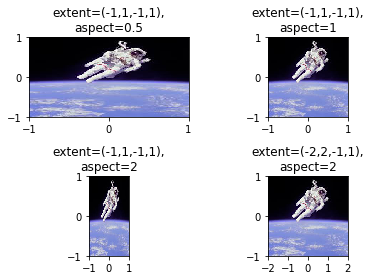

In [11]:
'''
Extent and aspect
When using plt.imshow() to display an array, the default behavior is to keep pixels square
so that the height to width ratio of the output matches the ratio determined by the shape 
of the array. In addition, by default, the x- and y-axes are labeled by the number of
samples in each direction.
The ratio of the displayed width to height is known as the image aspect and the range used
to label the x- and y-axes is known as the image extent. The default aspect value of 'auto'
keeps the pixels square and the extents are automatically computed from the shape of the
array if not specified otherwise.
In this exercise, you will investigate how to set these options explicitly by plotting
the same image in a 2 by 2 grid of subplots with distinct aspect and extent options.
INSTRUCTIONS
100XP
Display img in the top left subplot with horizontal extent from -1 to 1, vertical extent 
from -1 to 1, and aspect ratio 0.5.
Display img in the top right subplot with horizontal extent from -1 to 1, vertical extent
from -1 to 1, and aspect ratio 1.
Display img in the bottom left subplot with horizontal extent from -1 to 1, vertical extent
from -1 to 1, and aspect ratio 2.
Display img in the bottom right subplot with horizontal extent from -2 to 2, vertical extent
from -1 to 1, and aspect ratio 2.
'''
# Load the image into an array: img
img = plt.imread('image.jpg')

# Specify the extent and aspect ratio of the top left subplot
plt.subplot(2,2,1)
plt.title('extent=(-1,1,-1,1),\naspect=0.5') 
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=0.5)

# Specify the extent and aspect ratio of the top right subplot
plt.subplot(2,2,2)
plt.title('extent=(-1,1,-1,1),\naspect=1')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=1)

# Specify the extent and aspect ratio of the bottom left subplot
plt.subplot(2,2,3)
plt.title('extent=(-1,1,-1,1),\naspect=2')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=2)

# Specify the extent and aspect ratio of the bottom right subplot
plt.subplot(2,2,4)
plt.title('extent=(-2,2,-1,1),\naspect=2')
plt.xticks([-2,-1,0,1,2])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-2,2,-1,1), aspect=2)

# Improve spacing and display the figure
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The smallest & largest pixel intensities are 0 & 255.
The rescaled smallest & largest pixel intensities are 0.0 & 256.0.


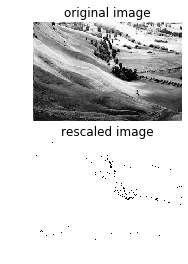

In [16]:
'''
Rescaling pixel intensities
Sometimes, low contrast images can be improved by rescaling their intensities. For instance,
this image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable
via Wikimedia Commons, CC BY 2.0) has no pixel values near 0 or near 255 (the limits of valid 
intensities).
For this exercise, you will do a simple rescaling (remember, an image is NumPy array)
to translate and stretch the pixel intensities so that the intensities of the new image 
fill the range from 0 to 255.
INSTRUCTIONS
100XP
Use the methods .min() and .max() to save the minimum and maximum values from the array
image as pmin and pmax respectively.
Create a new 2-D array rescaled_image using 256*(image-pmin)/(pmax-pmin)
Plot the original array image in the top subplot of a 2×1
2
×
1
grid.
Plot the new array rescaled_image in the bottom subplot of a 2×1
2
×
1
 grid.
 '''
 # Load the image into an array: image
image = plt.imread('image2.jpg')

# Extract minimum and maximum values from the image: pmin, pmax
pmin, pmax = image.min(), image.max()
print("The smallest & largest pixel intensities are %d & %d." % (pmin, pmax))

# Rescale the pixels: rescaled_image
rescaled_image = 256*(image - pmin) / (pmax - pmin)
print("The rescaled smallest & largest pixel intensities are %.1f & %.1f." % 
      (rescaled_image.min(), rescaled_image.max()))

# Display the original image in the top subplot
plt.subplot(2,1,1)
plt.title('original image')
plt.axis('off')
plt.imshow(image)

# Display the rescaled image in the bottom subplot
plt.subplot(2,1,2)
plt.title('rescaled image')
plt.axis('off')
plt.imshow(rescaled_image)

plt.show()

## Seaborn statistical data visualization

recap pandas:
labelled tabular data structure
label on rows: index
labels on columns: columns
columns are pandas series

In [20]:
t.head(3)

yyyy  mm  tmax  tmin    af   rain
0  1883   1   6.3   1.7   6.0  122.1
1  1883   2   8.0   2.8   2.0   69.8
2  1883   3   4.8  -1.6  23.0   29.6

C:\Users\dave_\Anaconda3_2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


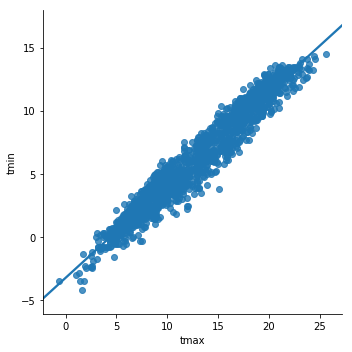

In [4]:
#using implot()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#tips=sns.load_datasets('tips')
sns.lmplot(x='tmax',y='tmin', data=t)
plt.show()

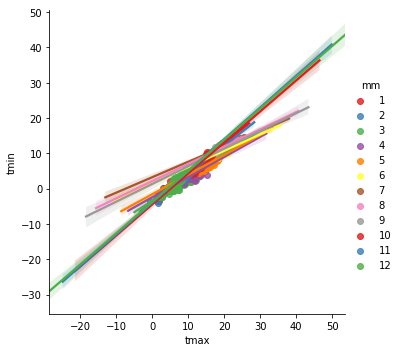

In [21]:
#grouping factors, same plot
sns.lmplot(x='tmax',y='tmin', data=t, hue='mm', palette='Set1')
plt.show()

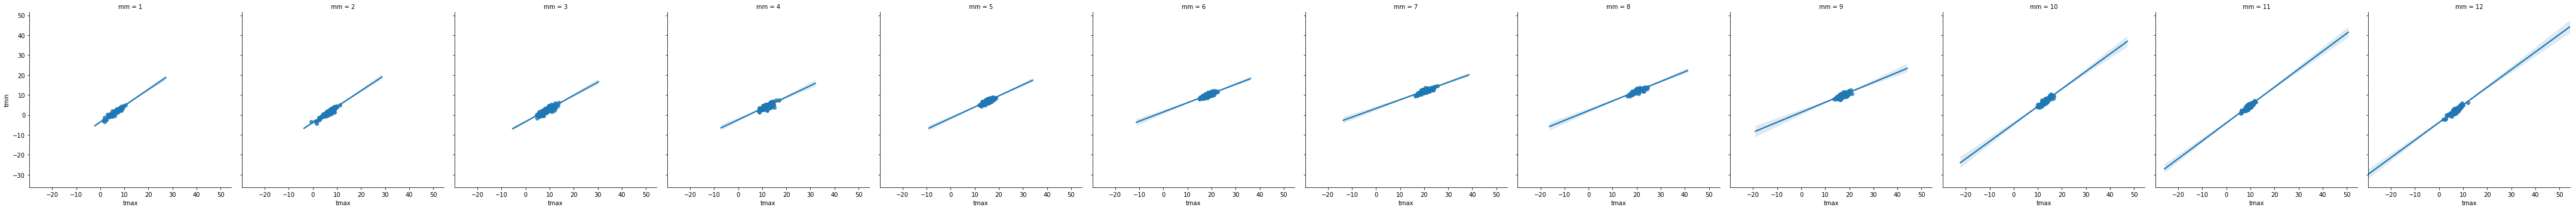

In [22]:
#grouping factors, subplots useing col=   #should be 12 pictures in total, one per each mm
sns.lmplot(x='tmax',y='tmin', data=t, col='mm')
plt.show()

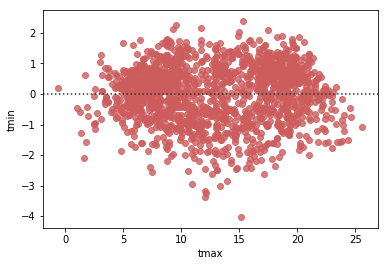

In [23]:
### residual plots using residplot()
sns.residplot(x='tmax', y='tmin', data=t, color='indianred')


#x, y can be arrays or strings
#data is dataframe (optional)
#optional arguments eg color as in matplotlib

### visualizing uninvariate distributions
uninvariate -> 'one variable'
visualization techniques for sampled uninvariate data
strip plots, swarm plots, violin plots

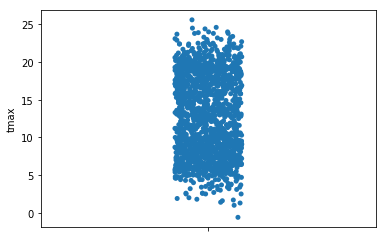

In [26]:
#using stripplot
sns.stripplot(y='tmax', data=t)
plt.ylabel('tmax')
plt.show()

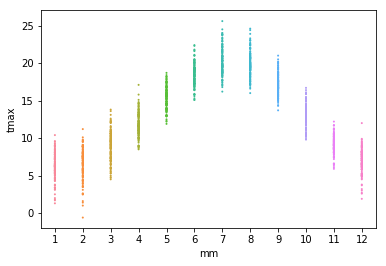

In [35]:
#grouping with stripplot()
sns.stripplot(x='mm', y='tmax', data=t, size=2,jitter=False)
plt.ylabel('tmax')
plt.show()

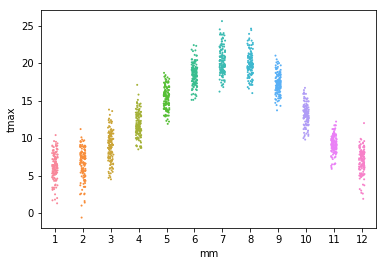

In [36]:
#spreading out strip plots
sns.stripplot(x='mm', y='tmax', data=t, size=2, jitter=True)
plt.ylabel('tmax')
plt.show()

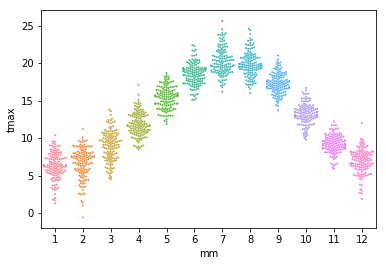

In [40]:
#swarm plots
sns.swarmplot(x='mm', y='tmax', data=t, size=2)
plt.ylabel('tmax')
plt.show()

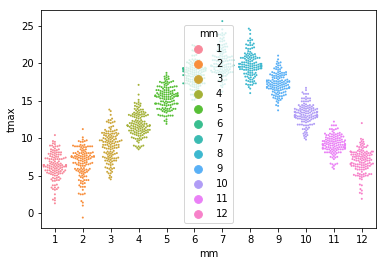

In [41]:
#more grouping
sns.swarmplot(x='mm', y='tmax', data=t, size=2, hue='mm')
plt.ylabel('tmax')
plt.show()

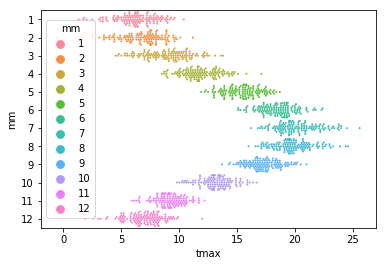

In [44]:
#changing orientation
sns.swarmplot(x='tmax', y='mm', data=t, size=2, hue='mm', orient='h')
plt.xlabel('tmax')
plt.show()

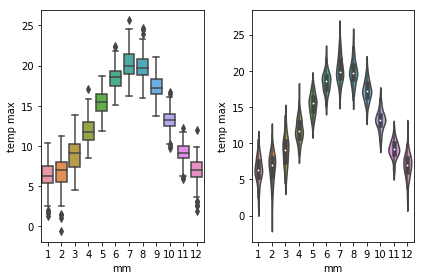

In [5]:
#box plots and violin plots
plt.subplot(1,2,1)
sns.boxplot(x='mm', y='tmax', data=t)
plt.ylabel('temp max')
plt.subplot(1,2,2)
sns.violinplot(x='mm', y='tmax', data=t)
plt.ylabel('temp max')
plt.tight_layout()
plt.show()


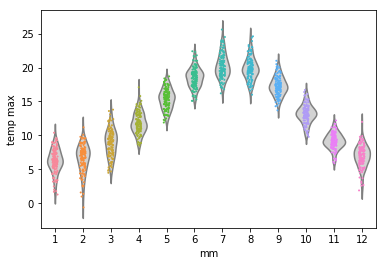

In [8]:
#combining plots
#violin plots
sns.violinplot(x='mm', y='tmax', data=t, inner=None, color='lightgray')
#stripplot
sns.stripplot(x='mm', y='tmax', data=t, size=2,jitter=True )
plt.ylabel('temp max')
plt.show()


### visualiazing multivariate distributions
bivariate = two variables
multivariate = multiple variables
visualizing relationships in multivariate data: joint plots, pair plots, heat maps

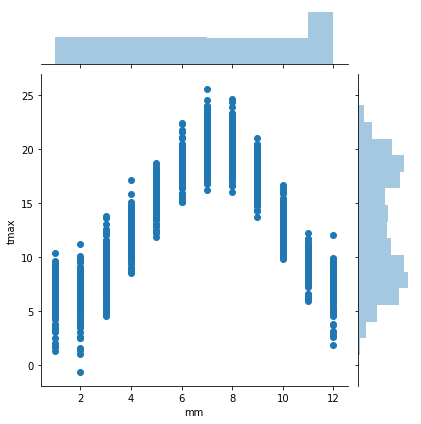

In [9]:
#joint plot
sns.jointplot(x='mm', y='tmax', data=t)
plt.show()

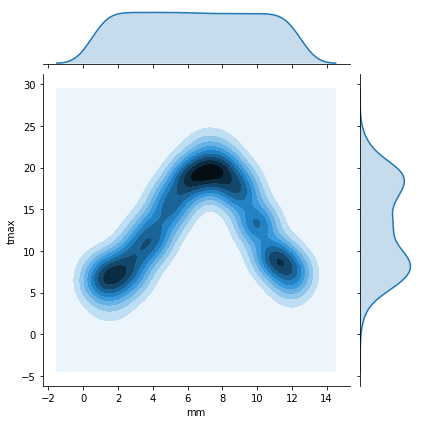

In [10]:
#joint plot using KDE
sns.jointplot(x='mm', y='tmax', data=t, kind='kde')
plt.show()

C:\Users\dave_\Anaconda3_2\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dave_\Anaconda3_2\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


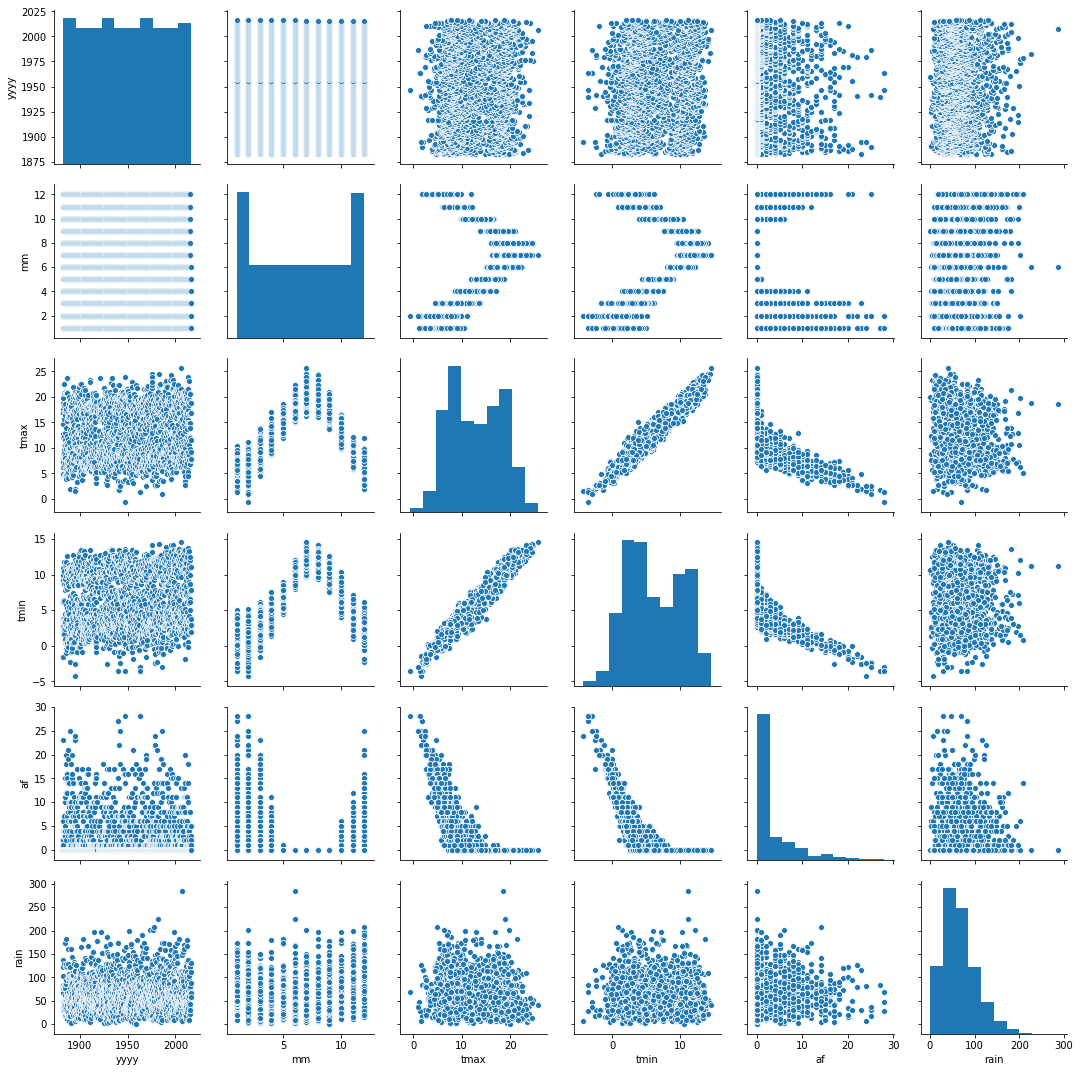

In [11]:
#pair plot
sns.pairplot(t)
plt.show()

C:\Users\dave_\Anaconda3_2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\dave_\Anaconda3_2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\dave_\Anaconda3_2\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\dave_\Anaconda3_2\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\dave_\Anaconda3_2\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


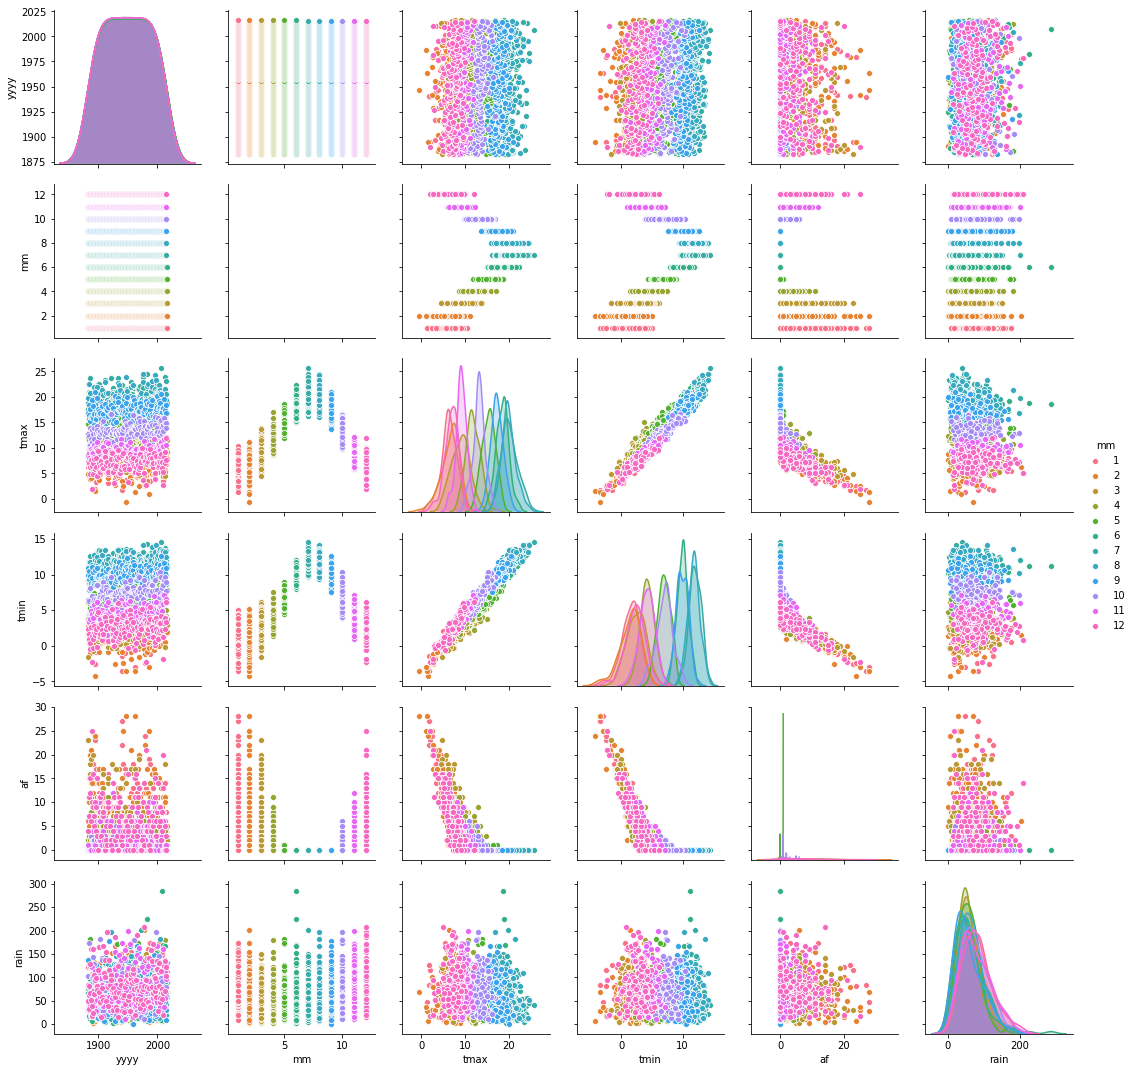

In [12]:
#pairplot with hue
sns.pairplot(t, hue='mm')
plt.show()

             mm       tmax       tmin         af
mm    11.923984   4.344462   4.654329  -5.396208
tmax   4.344462  28.458897  20.950111 -18.920203
tmin   4.654329  20.950111  16.307413 -14.663740
af    -5.396208 -18.920203 -14.663740  23.976561


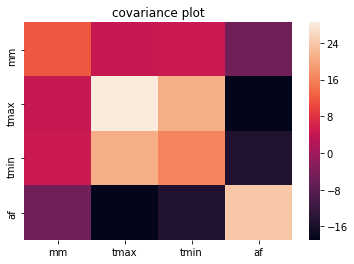

In [34]:
#covariance heat map of t data
import numpy as np
t_new=t
del t_new['yyyy']
del t_new['rain']
covariance=t_new.cov()
#covariance = np.cov(t.tmax, t.mm, rowvar=0)
#covariance = np.cov(t.mm, t.tmax)
#covariance = np.cov(t)
print(covariance)

sns.heatmap(covariance)
plt.title('covariance plot')
plt.show()

### Exercises

In [36]:
auto = pd.read_csv('auto-mpg.csv')
auto.head(3)

mpg  cyl  displ   hp  weight  accel  yr origin              name  color  \
0  18.0    6  250.0   88    3139   14.5  71     US      ford mustang    red   
1   9.0    8  304.0  193    4732   18.5  70     US          hi 1200d  green   
2  36.1    4   91.0   60    1800   16.4  78   Asia  honda civic cvcc   blue   

        size marker  
0  27.370336      o  
1  62.199511      o  
2   9.000000      x

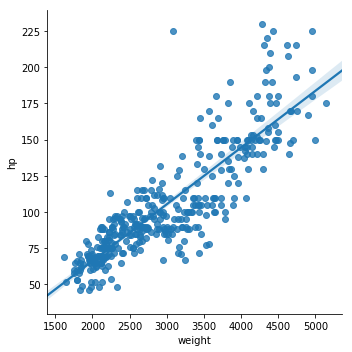

In [37]:
'''
Simple linear regressions
As you have seen, seaborn provides a convenient interface to generate complex and 
great-looking statistical plots. One of the simplest things you can do using seaborn 
is to fit and visualize a simple linear regression between two variables using sns.lmplot().
One difference between seaborn and regular matplotlib plotting is that you can pass
pandas DataFrames directly to the plot and refer to each column by name. For example,
if you were to plot the column 'price' vs the column 'area' from a DataFrame df, you
could call sns.lmplot(x='area', y='price', data=df).
In this exercise, you will once again use the DataFrame auto containing the auto-mpg 
dataset. You will plot a linear regression illustrating the relationship between automobile weight and horse power.
INSTRUCTIONS
100XP
Import matplotlib.pyplot and seaborn using the standard names plt and sns respectively.
Plot a linear regression between the 'weight' column (on the x-axis) and the 'hp' column 
(on the y-axis) from the DataFrame auto.
Display the plot as usual with plt.show(). This has been done for you, so hit 'Submit Answer'
to view the plot.
'''
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(data=auto, x='weight', y='hp')

# Display the plot
plt.show()

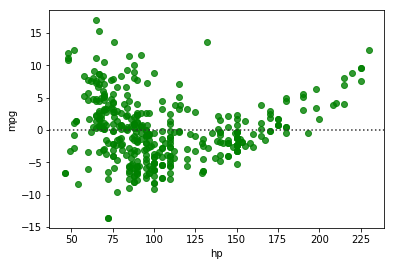

In [38]:
'''
Plotting residuals of a regression
Often, you don't just want to see the regression itself but also see the residuals to get
a better idea how well the regression captured the data. Seaborn provides sns.residplot() 
for that purpose, visualizing how far datapoints diverge from the regression line.
In this exercise, you will visualize the residuals of a regression between the 'hp' column
(horse power) and the 'mpg' column (miles per gallon) of the auto DataFrame used previously.
INSTRUCTIONS
100XP
Import matplotlib.pyplot and seaborn using the standard names plt and sns respectively.
Generate a green residual plot of the regression between 'hp' (on the x-axis) and 'mpg'
(on the y-axis). You will need to specify the additional data and color parameters.
Display the plot as usual using plt.show(). This has been done for you, so hit 'Submit Answer'
to view the plot.
'''
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x='hp', y='mpg', data=auto, color='green')

# Display the plot
plt.show()

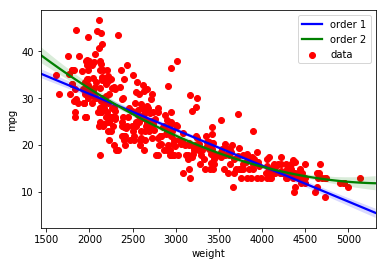

In [41]:
'''
Higher-order regressions
When there are more complex relationships between two variables, a simple first order 
regression is often not sufficient to accurately capture the relationship between the variables.
Seaborn makes it simple to compute and visualize regressions of varying orders.
Here, you will plot a second order regression between the horse power ('hp') and miles per
gallon ('mpg') using sns.regplot() (the function sns.lmplot() is a higher-level interface
to sns.regplot()). However, before plotting this relationship, compare how the residual 
changes depending on the order of the regression. Does a second order regression perform
significantly better than a simple linear regression?
A principal difference between sns.lmplot() and sns.regplot() is the way in which matplotlib 
options are passed (sns.regplot() is more permissive).
For both sns.lmplot() and sns.regplot(), the keyword order is used to control the order
of polynomial regression.
The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter
plot points again.
INSTRUCTIONS
100XP
Modify the call to plt.scatter() to plot auto['weight'] on the x-axis and auto['mpg'] 
on the y-axis, filled with red circles and with label='data'.
Plot a linear regression line of 'order 1' between 'weight' and 'mpg' in 'blue' without
the scatter points.
You need to specify the label and color parameters, in addition to scatter=None.
Plot a linear regression line of 'order 2' between 'weight' and 'mpg' in 'green' without
the scatter points.
To force a higher order regression, you need to specify the order parameter. Here,
it should be 2.
Add a legend to the 'upper right'.
'''
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='blue', label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, order=2, color='green', label='order 2')



# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

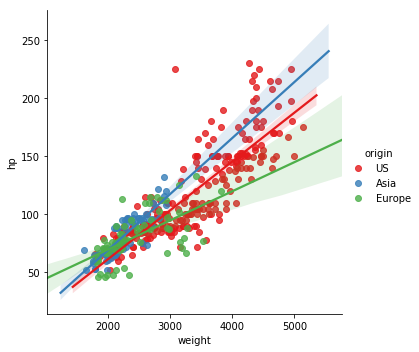

In [42]:
'''
Grouping linear regressions by hue
Often it is useful to compare and contrast trends between different groups.
Seaborn makes it possible to apply linear regressions separately for subsets of the data 
by applying a groupby operation. Using the hue argument, you can specify a categorical
variable by which to group data observations. The distinct groups of points are used to 
produce distinct regressions with different hues in the plot.
In the automobile dataset - which has been pre-loaded here as auto - you can view the
relationship between weight ('weight') and horsepower ('hp') of the cars and group them
by their origin ('origin'), giving you a quick visual indication how the relationship
differs by continent.
INSTRUCTIONS
100XP
Plot a linear regression between 'weight' and 'hp' grouped by 'origin'.
Use the keyword argument hue to group rows with the categorical column 'origin'.
Use the keyword argument palette to specify the 'Set1' palette for coloring the 
distinct groups.
'''
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(data=auto, x='weight', y='hp', hue='origin', palette='Set1')

# Display the plot
plt.show()

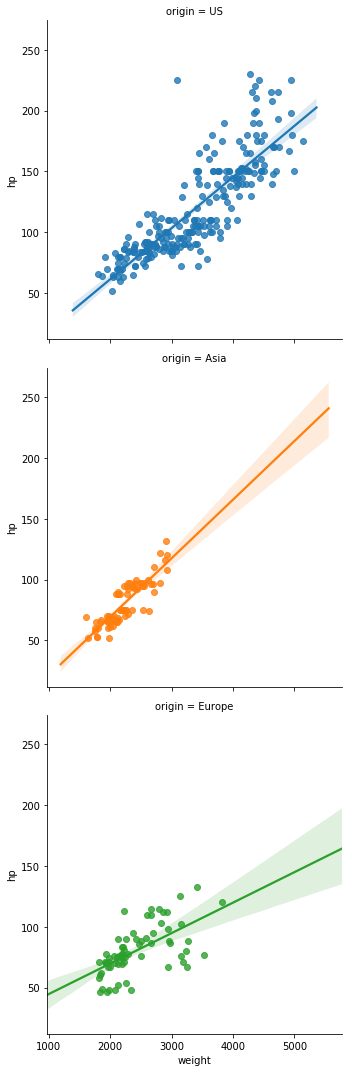

In [43]:
'''
Grouping linear regressions by row or column
Rather than overlaying linear regressions of grouped data in the same plot, we may want 
to use a grid of subplots. The sns.lmplot() accepts the arguments row and/or col to arrangements
of subplots for regressions.
You'll use the automobile dataset again and, this time, you'll use the keyword argument 
row to display the subplots organized in rows. That is, you'll produce horsepower vs. weight 
regressions grouped by continent of origin in separate subplots stacked vertically.
INSTRUCTIONS
100XP
Plot linear regressions of 'hp' (on the y-axis) versus 'weight' (on the x-axis) grouped 
row-wise by 'origin' from DataFrame auto.
Use the keyword argument row to group observations with the categorical column 'origin'
in subplots organized in rows.
'''
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(data=auto, x='weight', y='hp', hue='origin', row='origin')

# Display the plot
plt.show()

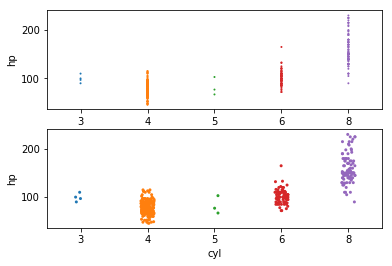

In [46]:
'''
Constructing strip plots
Regressions are useful to understand relationships between two continuous variables. Often 
we want to explore how the distribution of a single continuous variable is affected by a second 
categorical variable. Seaborn provides a variety of plot types to perform these types of 
comparisons between univariate distributions.
The strip plot is one way of visualizing this kind of data. It plots the distribution of
variables for each category as individual datapoints. For vertical strip plots (the default),
distributions of continuous values are laid out parallel to the y-axis and the distinct 
categories are spaced out along the x-axis.
For example, sns.stripplot(x='type', y='length', data=df) produces a sequence of vertical
strip plots of length distributions grouped by type (assuming length is a continuous column
and type is a categorical column of the DataFrame df).
Overlapping points can be difficult to distinguish in strip plots. The argument jitter=True
helps spread out overlapping points.
Other matplotlib arguments can be passed to sns.stripplot(), e.g., marker, color, size, etc.
INSTRUCTIONS
100XP
In the first row of subplots, make a strip plot showing distribution of 'hp' values grouped 
horizontally by 'cyl'.
In the second row of subplots, make a second strip plot with improved readability.
In particular, you'll call sns.stripplot() again, this time adding jitter=True and 
decreasing the point size to 3 using the size parameter.
'''
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x='cyl', y='hp', data=auto, size=2, jitter=False)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='cyl', y='hp', data=auto, jitter=True, size=3)

# Display the plot
plt.show()

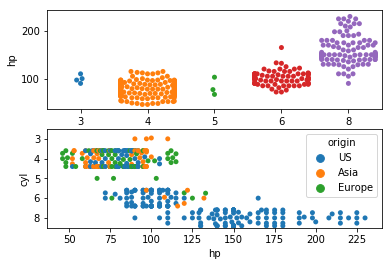

In [47]:
'''
Constructing swarm plots
As you have seen, a strip plot can be visually crowded even with jitter applied and smaller 
point sizes. An alternative is provided by the swarm plot (sns.swarmplot()), which is very 
similar but spreads out the points to avoid overlap and provides a better visual overview 
of the data.
The syntax for sns.swarmplot() is similar to that of sns.stripplot(), e.g., sns.swarmplot
(x='type', y='length', data=df).
The orientation for the continuous variable in the strip/swarm plot can be inferred from 
the choice of the columns x and y from the DataFrame data. The orientation can be set explicitly
using orient='h' (horizontal) or orient='v' (vertical).
Another grouping can be added in using the hue keyword. For instance, using 
sns.swarmplot(x='type', y='length', data=df, hue='build year') makes a swarm plot from 
the DataFrame df with the 'length' column values spread out vertically, horizontally
grouped by the column 'type' and each point colored by the categorical column 'build year'.
In this exercise, you'll use the auto DataFrame again to illustrate the use of sns.swarmplot()
with grouping by hue and with explicit specification of the orientation using the keyword orient.
INSTRUCTIONS
100XP
In the first row of subplots, make a swarm plot showing distribution of 'hp' values grouped
horizontally by 'cyl'.
In the second row of subplots, make a second swarm plot with horizontal orientation (i.e., 
grouped vertically by 'cyl' with 'hp' value spread out horizontally) with points colored by 
'origin'. You need to specify the orient parameter to explicitly set the horizontal orientation.
'''
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x='cyl', y='hp', data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x='hp', y='cyl', data=auto, hue='origin', orient='h')

# Display the plot
plt.show()

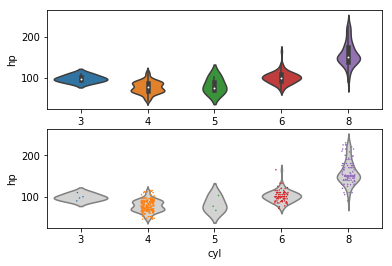

In [48]:
'''
Constructing violin plots
Both strip and swarm plots visualize all the datapoints. For large datasets, this can result
in significant overplotting. Therefore, it is often useful to use plot types which reduce 
a dataset to more descriptive statistics and provide a good summary of the data. Box and 
whisker plots are a classic way of summarizing univariate distributions but seaborn provides
a more sophisticated extension of the standard box plot, called a violin plot.
Here, you will produce violin plots of the distribution of horse power ('hp') by the number
of cylinders ('cyl'). Additionally, you will combine two different plot types by overlaying
a strip plot on the violin plot.
As before, the DataFrame has been pre-loaded for you as auto.

INSTRUCTIONS
100XP
In the first row of subplots, make a violin plot showing the distribution of 'hp' grouped by 
'cyl'.
In the second row of subplots, make a second violin plot without the inner annotations 
(by specifying inner=None) and with the color 'lightgray'.
In the second row of subplots, overlay a strip plot with jitter and a point size of 1.5.
'''
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x='cyl', y='hp', data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='cyl', y='hp', data=auto, inner=None, color='lightgray')

# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl', y='hp', data=auto, size=1.5, jitter=True)

# Display the plot
plt.show()

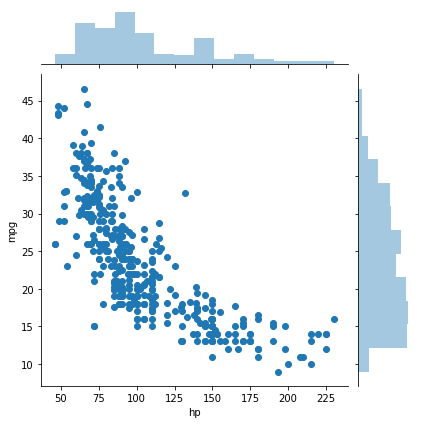

In [49]:
'''
Plotting joint distributions (1)
There are numerous strategies to visualize how pairs of continuous random variables vary
jointly. Regression and residual plots are one strategy. Another is to visualize a bivariate
distribution.
Seaborn's sns.jointplot() provides means of visualizing bivariate distributions. The basic
calling syntax is similar to that of sns.lmplot(). By default, calling sns.jointplot(x, y, data) 
renders a few things:
A scatter plot using the specified columns x and y from the DataFrame data.
A (univariate) histogram along the top of the scatter plot showing distribution of the column x.
A (univariate) histogram along the right of the scatter plot showing distribution of the column y.
INSTRUCTIONS
100XP
Use sns.jointplot() to visualize the joint variation of the columns 'hp' (on the x-axis)
and 'mpg' (on the y-axis) from the DataFrame auto.
'''
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='hp', y='mpg', data=auto)

# Display the plot
plt.show()

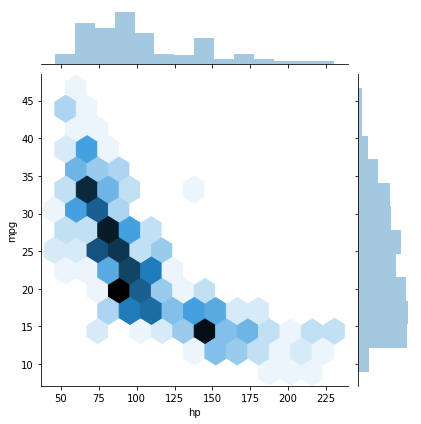

In [50]:
'''
Plotting joint distributions (2)
The seaborn function sns.jointplot() has a parameter kind to specify how to visualize the
joint variation of two continuous random variables (i.e., two columns of a DataFrame)
kind='scatter' uses a scatter plot of the data points
kind='reg' uses a regression plot (default order 1)
kind='resid' uses a residual plot
kind='kde' uses a kernel density estimate of the joint distribution
kind='hex' uses a hexbin plot of the joint distribution
For this exercise, you will again use sns.jointplot() to display the joint distribution
of the hp and mpg columns of the auto DataFrame. This time, you will use kind='hex' 
to generate a hexbin plot of the joint distribution.
INSTRUCTIONS
100XP
Create a hexbin plot of the joint distribution between 'hp' and 'mpg'.
'''
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='hex')

# Display the plot
plt.show()

    mpg  cyl  displ   hp  weight  accel  yr  origin              name  color  \
0  18.0    6  250.0   88    3139   14.5  71      US      ford mustang    red   
1   9.0    8  304.0  193    4732   18.5  70      US          hi 1200d  green   
2  36.1    4   91.0   60    1800   16.4  78    Asia  honda civic cvcc   blue   
3  18.5    6  250.0   98    3525   19.0  77      US      ford granada    red   
4  34.3    4   97.0   78    2188   15.8  80  Europe         audi 4000   blue   

        size marker  
0  27.370336      o  
1  62.199511      o  
2   9.000000      x  
3  34.515625      o  
4  13.298178      s  


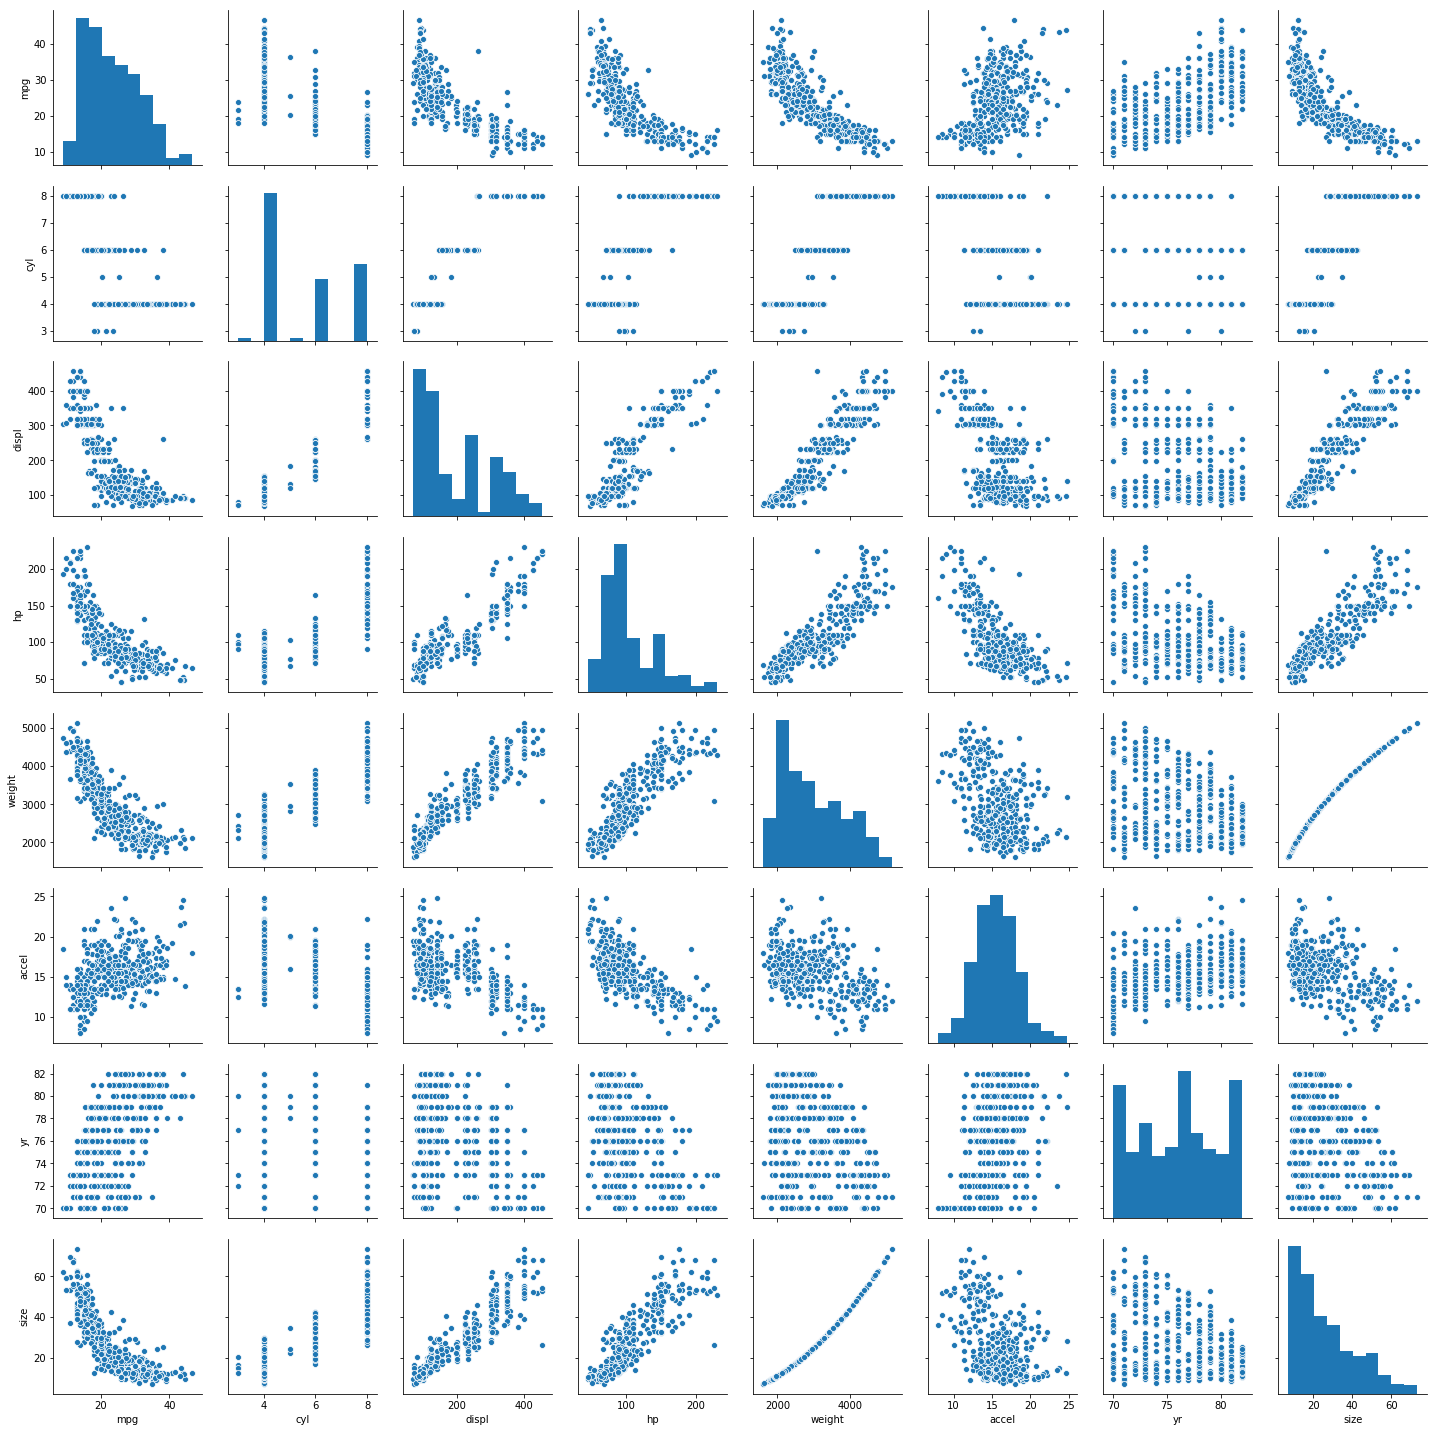

In [51]:
'''
Plotting distributions pairwise (1)
Data sets often contain more than two continuous variables. The function sns.jointplot()
is restricted to representing joint variation between only two quantities (i.e., two columns
of a DataFrame). Visualizing multivariate relationships is trickier.
The function sns.pairplot() constructs a grid of all joint plots pairwise from all pairs of
(non-categorical) columns in a DataFrame. The syntax is very simple: sns.pairplot(df), 
where df is a DataFrame. The non-categorical columns are identified and the corresponding 
joint plots are plotted in a square grid of subplots. The diagonal of the subplot grid 
shows the univariate histograms of the individual columns.
In this exercise, you will use a DataFrame auto comprising only three columns from the 
original auto-mpg data set.
INSTRUCTIONS

Print the first five rows of the DataFrame auto. This is done for you.
Plot the joint distributions between columns from the entire DataFrame auto.
'''
# Print the first 5 rows of the DataFrame
print(auto.head())

# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(auto)

# Display the plot
plt.show()

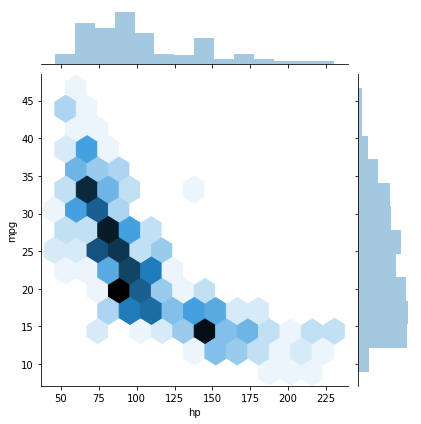

In [52]:
'''
Plotting joint distributions (2)
The seaborn function sns.jointplot() has a parameter kind to specify how to visualize the 
joint variation of two continuous random variables (i.e., two columns of a DataFrame)
kind='scatter' uses a scatter plot of the data points
kind='reg' uses a regression plot (default order 1)
kind='resid' uses a residual plot
kind='kde' uses a kernel density estimate of the joint distribution
kind='hex' uses a hexbin plot of the joint distribution
For this exercise, you will again use sns.jointplot() to display the joint distribution
of the hp and mpg columns of the auto DataFrame. This time, you will use kind='hex' to
generate a hexbin plot of the joint distribution.
INSTRUCTIONS
100XP
Create a hexbin plot of the joint distribution between 'hp' and 'mpg'.
'''
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='hex')

# Display the plot
plt.show()

                mpg          cyl         displ            hp         weight  \
mpg       60.918142   -10.352928   -657.585207   -233.857926   -5517.440704   
cyl      -10.352928     2.909696    169.721949     55.348244    1300.424363   
displ   -657.585207   169.721949  10950.367554   3614.033744   82929.100139   
hp      -233.857926    55.348244   3614.033744   1481.569393   28265.620231   
weight -5517.440704  1300.424363  82929.100139  28265.620231  721484.709008   
accel      9.115514    -2.375052   -156.994435    -73.186967    -976.815253   
yr        16.691477    -2.171930   -142.572133    -59.036432    -967.228457   
size     -95.753891    23.110219   1478.112751    509.121366   12814.879225   

             accel          yr          size  
mpg       9.115514   16.691477    -95.753891  
cyl      -2.375052   -2.171930     23.110219  
displ  -156.994435 -142.572133   1478.112751  
hp      -73.186967  -59.036432    509.121366  
weight -976.815253 -967.228457  12814.879225  
accel 

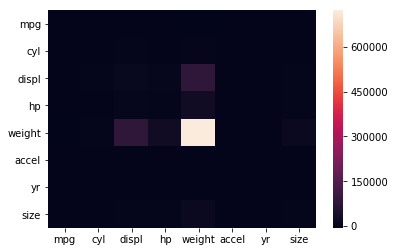

In [55]:
'''
Visualizing correlations with a heatmap
Plotting relationships between many variables using a pair plot can quickly get visually
overwhelming. It is therefore often useful to compute covariances between the variables
instead. The covariance matrix can then easily be visualized as a heatmap. A heatmap is
effectively a pseudocolor plot with labelled rows and columns (i.e., a pseudocolor plot
based on a pandas DataFrame rather than a matrix). The DataFrame does not have to be 
square or symmetric (but, in the context of a covariance matrix, it is both).
In this exercise, you will view the covariance matrix between the continuous variables 
in the auto-mpg dataset. You do not have to know here how the covariance matrix is computed; 
the important point is that its diagonal entries are all 1s, and the off-diagonal entries
are between -1 and +1 (quantifying the degree to which variable pairs vary jointly).
It is also, then, a symmetric matrix.
INSTRUCTIONS
100XP
Print the covariance matrix cov_matrix to examine its contents and labels.
This has been done for you.
Plot the covariance matrix cov_matrix using sns.heatmap().
'''
cov_matrix=auto.cov()
# Print the covariance matrix
print(cov_matrix)

# Visualize the covariance matrix using a heatmap

sns.heatmap(cov_matrix)

# Display the heatmap
plt.show()

## Analysing time series and images

### Visualizing time series

In [10]:
import pandas as pd
weather=pd.read_csv('weather_1m.csv', index_col=5, parse_dates=True)
weather.head(2)

mm  tmax  tmin  af   rain
date                                 
1905-01-25   1   6.3   1.7   6  122.1
1905-02-24   2   8.0   2.8   2   69.8

In [11]:
type(weather.index)

pandas.core.indexes.datetimes.DatetimeIndex

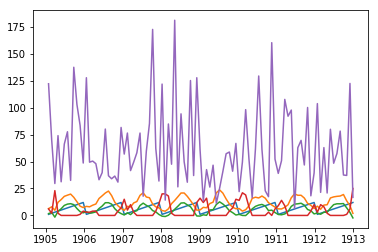

In [12]:
import matplotlib.pyplot as plt
plt.plot(weather)
plt.show()

In [13]:
#slicing time series
temperature=weather['tmax']
temperature.head(3)
march_apr=temperature['1905-03':'1905-04'] #data of march and april 1883 only

In [14]:
temperature.head(3)

date
1905-01-25    6.3
1905-02-24    8.0
1905-03-26    4.8
Name: tmax, dtype: float64

In [15]:
march_apr.head(3)

date
1905-03-26     4.8
1905-04-25    12.2
Name: tmax, dtype: float64

In [16]:
march_apr.iloc[-1:] #extract last 1 entries from time series

date
1905-04-25    12.2
Name: tmax, dtype: float64

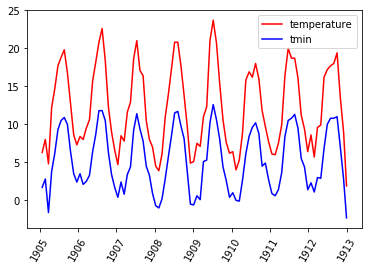

In [17]:
#plotting time series
plt.plot(weather.tmax, color='red', label='temperature')
plt.plot(weather.tmin, color='blue', label='tmin')
plt.legend(loc='upper right')
plt.xticks(rotation=60)
plt.show()

In [21]:
#selecting and formatting dates

year_1906 = temperature['1906-']
year_1906.head(3)

date
1906-01-20    8.4
1906-02-19    8.0
1906-03-21    9.5
Name: tmax, dtype: float64

In [22]:
dates = year_1906.index[::3] #pick every 4 month
print(dates)

DatetimeIndex(['1906-01-20', '1906-04-20', '1906-07-19', '1906-10-17'], dtype='datetime64[ns]', name='date', freq=None)


In [23]:
#make formated labels
labels = dates.strftime('%b %d')
print(labels)

Index(['Jan 20', 'Apr 20', 'Jul 19', 'Oct 17'], dtype='object')


#cleaning up ticks on axis
#plotting time series
plt.plot(weather.tmax, color='red', label='temperature')
plt.plot(weather.tmin, color='blue', label='tmin')
plt.legend(loc='upper right')
plt.xticks(dates,labels,rotation=60)
plt.show()

### time series with moving windows
moving window calculations: averages, medians, standard deviations
extracts information on longer time scakes
see pandas courses on how to compute

### Histogram equalization in images
origina image -> equalized image

C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


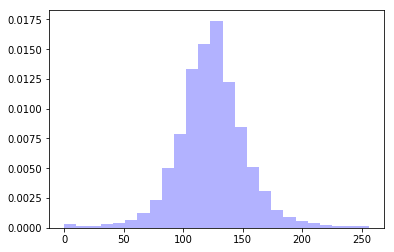

In [26]:
#image histograms
#read image to a numpy array
orig = plt.imread('low-contrast-moon.jpg')
pixels = orig.flatten()
plt.hist(pixels, bins=25,range=(0,256), normed=True, color='blue',alpha=0.3)
plt.show()


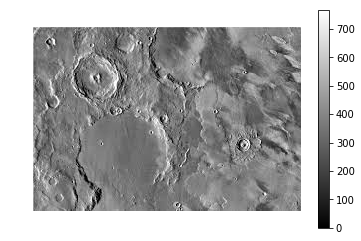

In [27]:
# Compute the sum of the red, green and blue channels: intensity
intensity = orig.sum(axis=2)

# Display the intensity with a colormap of 'gray'
plt.imshow(intensity, cmap='gray')

# Add a colorbar
plt.colorbar()

# Hide the axes and show the figure
plt.axis('off')
plt.show()

In [28]:
minval,maxval = orig.min(), orig.max()
print(minval, maxval)

0 255


In [29]:
#rescaling the image
minval,maxval = orig.min(), orig.max()
print(minval,maxval)

0 255


In [41]:
rescaled = (125/(maxval-minval)) * (pixels - minval)
print(rescaled.min(), rescaled.max())


0.0 125.0


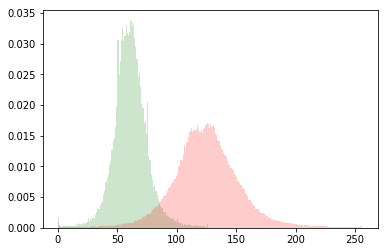

In [64]:
#plt.hist(orig.flatten(), bins=256,range=(0,256), normed=True, color='blue',alpha=0.2)
plt.hist(rescaled.flatten(),bins=256,range=(0,256), normed=True, color='green',alpha=0.2)
plt.hist(res.flatten(),bins=256,range=(0,256), normed=True, color='red',alpha=0.2)

plt.show()

In [46]:
print(rescaled)

[86.2745098  86.2745098  86.2745098  ... 54.90196078 54.90196078
 54.90196078]


In [ ]:
import numpy as np
plt.axis('off')
plt.imshow((rescaled))
plt.show()

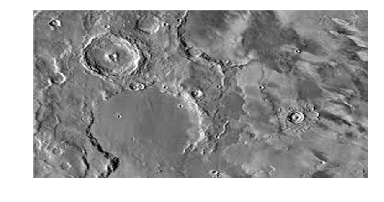

In [63]:
import cv2
res=cv2.resize(orig, dsize=(800, 400), interpolation=cv2.INTER_CUBIC)
plt.axis('off')
plt.imshow((res))
plt.show()

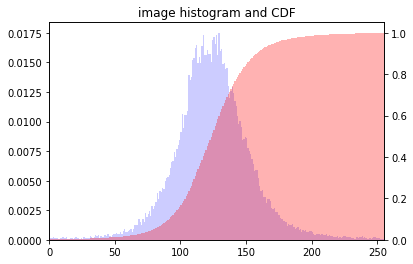

In [81]:
#image histogram and CDF
plt.hist(orig.flatten(), bins=256,range=(0,256), normed=True, color='blue',alpha=0.2)
plt.twinx()
orig_cdf,bins,patches = plt.hist(pixels,
                                 cumulative=True, bins=256, range=(0,256), normed=True,
                                color='red', alpha=0.3)
plt.title('image histogram and CDF')
plt.xlim((0,255))
plt.show()

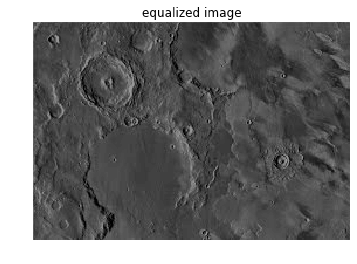

In [84]:
#equalizing intensity values
new_pixels = np.interp(pixels, bins[:-1], orig_cdf*0.6)
new = new_pixels.reshape(orig.shape)
plt.imshow(new)
plt.axis('off')
plt.title('equalized image')
plt.show()

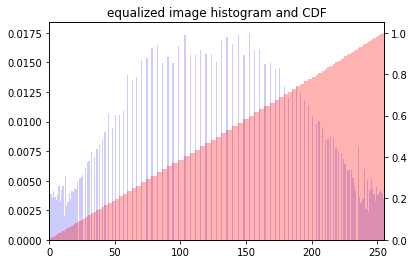

In [83]:
#equalized image histogram and CDF
plt.hist(new_pixels, bins=256,range=(0,256), normed=True, color='blue',alpha=0.2)
plt.twinx()
orig_cdf,bins,patches = plt.hist(new_pixels,
                                 cumulative=True, bins=256, range=(0,256), normed=True,
                                color='red', alpha=0.3)
plt.title('equalized image histogram and CDF')
plt.xlim((0,255))
plt.show()

### Exercises

In [30]:
import pandas as pd
stocks= pd.read_csv('stocks_viz.csv', index_col='Date', parse_dates=['Date'])
stocks.head(3)

AAPL       IBM      CSCO      MSFT
Date                                                
2000-01-03  111.937502  116.0000  108.0625  116.5625
2000-01-04  102.500003  112.0625  102.0000  112.6250
2000-01-05  103.999997  116.0000  101.6875  113.8125

In [31]:
aapl2=stocks['AAPL']
aapl2.head(3)

Date
2000-01-03    111.937502
2000-01-04    102.500003
2000-01-05    103.999997
Name: AAPL, dtype: float64

In [32]:
ibm2=stocks['IBM']
msft2=stocks['MSFT']
csco2=stocks["MSFT"]

In [33]:
aapl2.tail(3)

Date
2013-12-27    560.089989
2013-12-30    554.519981
2013-12-31    561.019997
Name: AAPL, dtype: float64

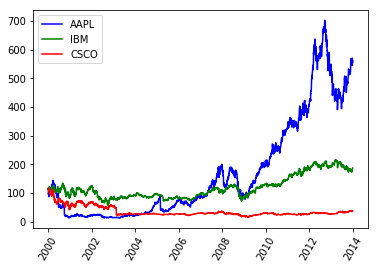

In [34]:
'''
Multiple time series on common axes
For this exercise, you will construct a plot showing four time series stocks on the same axes. The time series in question are represented in the session using the identifiers aapl, ibm, csco, and msft. You'll generate a single plot showing all the time series on common axes with a legend.
INSTRUCTIONS
100XP
Plot the aapl time series in blue with a label of 'AAPL'.
Plot the ibm time series in green with a label of 'IBM'.
Plot the csco time series in red with a label of 'CSCO'.
Plot the msft time series in magenta with a label of 'MSFT'.
Specify a rotation of 60 for the xticks with plt.xticks().
Add a legend in the 'upper left' corner of the plot.
'''
# Plot the aapl time series in blue
plt.plot(aapl2, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm2, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco2, color='red', label='CSCO')


# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()

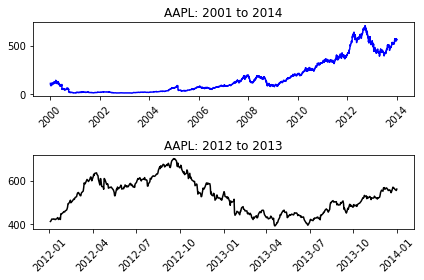

In [36]:
'''
Multiple time series slices (1)
You can easily slice subsets corresponding to different time intervals
from a time series. In particular, you can use strings like '2001:2005', 
'2011-03:2011-12', or '2010-04-19:2010-04-30' to extract data from time 
intervals of length 5 years, 10 months, or 12 days respectively.
Unlike slicing from standard Python lists, tuples, and strings, when
slicing time series by labels (and other pandas Series & DataFrames
by labels), the slice includes the right-most portion of the slice.
That is, extracting my_time_series['1990':'1995'] extracts data from 
my_time_series corresponding to 1990, 1991, 1992, 1993, 1994, and 1995 
inclusive.
You can use partial strings or datetime objects for indexing and slicing
from time series.
For this exercise, you will use time series slicing to plot the time series aapl over its full 11-year range and also over a shorter 2-year range. You'll arrange these plots in a 2×1
2
×
1
grid of subplots
INSTRUCTIONS
100XP
Plot the series aapl in 'blue' in the top subplot of a vertically-stacked 
pair of subplots, with the xticks rotated to 45 degrees.
Extract a slice named view from the series aapl containing data from
the years 2007 to 2008 (inclusive). This has been done for you.
Plot the slice view in black in the bottom subplot.
'''
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2014')
plt.plot(aapl2, color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl2['2012-':'2013-']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2012 to 2013')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()

In [19]:
view = aapl2['2012-':'2013-']
view.head(3)

Date
2012-03-01    411.230000
2012-04-01    413.440010
2012-05-01    418.029995
Name: AAPL, dtype: float64

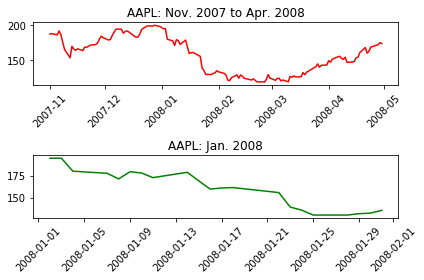

In [39]:
import seaborn as sns
'''
Multiple time series slices (2)
In this exercise, you will use the same time series aapl from the previous exercise and plot tighter views of the data.
Partial string indexing works without slicing as well. For instance, using my_time_series['1995'],
my_time_series['1999-05'], and my_time_series['2000-11-04'] respectively extracts views of the time 
series my_time_series corresponding to the entire year 1995, the entire month May 1999, and the entire day
November 4, 2000.

Extract a slice named view from the series aapl containing data from November 2007 to April 2008 (inclusive). 
This has been done for you.
Plot the slice view in 'red' in the top subplot of a vertically-stacked pair of subplots with the xticks rotated 
to 45 degrees.
Reassign the slice view to contain data from the series aapl for January 2008. This has been done for you.
Plot the slice view in 'green' in the bottom subplot with the xticks rotated to 45 degrees.
'''
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl2['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.plot(view, color='red')
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.xticks(rotation=45)

# Reassign the series by slicing the month January 2008
view = aapl2['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.plot(view, color='green')
plt.title('AAPL: Jan. 2008')
plt.xticks(rotation=45)

# Improve spacing and display the plot
plt.tight_layout()
plt.show()

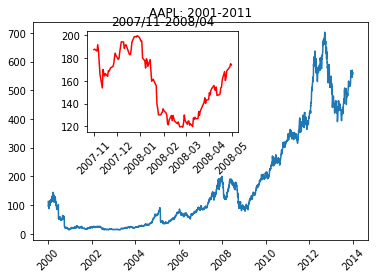

In [40]:
'''
Plotting an inset view
Remember, rather than comparing plots with subplots or overlayed plots, you can generate an inset view directly
using plt.axes(). In this exercise, you'll reproduce two of the time series plots from the preceding two exercises.
Your figure will contain an inset plot to highlight the dramatic changes in AAPL stock price between
November 2007 and April 2008 (as compared to the 11 years from 2001 to 2011).
INSTRUCTIONS
100XP
Extract a slice of series aapl from November 2007 to April 2008 inclusive. This has been done for you.
Plot the entire series aapl.
Create a set of axes with lower left corner (0.25, 0.5), width 0.35, and height 0.35. Pass these coordinates 
to plt.axes() as a list (all in units relative to the figure dimensions).
Plot the sliced view in the current axes in 'red'.
'''
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl2['2007-11':'2008-04']

# Plot the entire series 
plt.plot(aapl2)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25,0.5, 0.35, 0.35])

# Plot the sliced series in red using the current axes
plt.plot(view, color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()

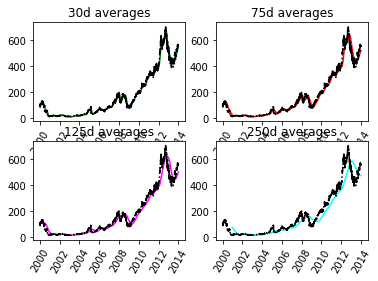

In [42]:
'''
Plotting moving averages
In this exercise, you will plot pre-computed moving averages of AAPL stock prices in distinct subplots.
The time series aapl is overlayed in black in each subplot for comparison.
The time series mean_30, mean_75, mean_125, and mean_250 have been computed for you (containing the windowed 
averages of the series aapl computed over windows of width 30 days, 75 days, 125 days, and 250 days respectively).
INSTRUCTIONS
100XP
In the top left subplot, plot the 30-day moving averages series mean_30 in 'green'.
In the top right subplot, plot the 75-day moving averages series mean_75 in 'red'.
In the bottom left subplot, plot the 125-day moving averages series mean_125 in 'magenta'.
In the bottom right subplot, plot the 250-day moving averages series mean_250 in 'cyan'.
'''

#calculating moving averages:
mean_30 = aapl2.rolling(window=30).mean()
mean_75 = aapl2.rolling(window=75).mean()
mean_125 = aapl2.rolling(window=125).mean()
mean_250 = aapl2.rolling(window=250).mean()


# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2,2,1)
plt.plot(mean_30, color='green')
plt.plot(aapl2, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
plt.plot(mean_75, color='red')
plt.plot(aapl2, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125, color='magenta')
plt.plot(aapl2, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2, 2, 4)
plt.plot(mean_250, color='cyan')
plt.plot(aapl2, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.show()

In [43]:
type(mean_30)

pandas.core.series.Series

In [46]:
mean_30.tail(3)

Date
2013-12-27    548.123661
2013-12-30    549.002326
2013-12-31    550.203325
Name: AAPL, dtype: float64

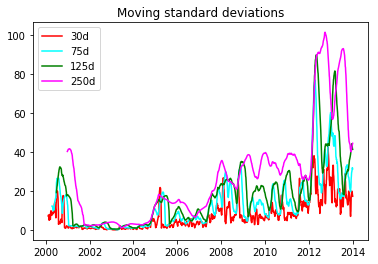

In [47]:
'''
Plotting moving standard deviations
Having plotted pre-computed moving averages of AAPL stock prices on distinct subplots in the previous exercise,
you will now plot pre-computed moving standard deviations of the same stock prices, this time together on common axes.
The time series aapl is not plotted in this case; it is of a different length scale than the standard deviations.
The time series std_30, std_75, stdn_125, & std_250 have been computed for you (containing the windowed standard 
deviations of the series aapl computed over windows of width 30 days, 75 days, 125 days, & 250 days respectively).
INSTRUCTIONS
100XP
Produce a single plot with four curves overlayed:
the series std_30 in 'red' (with corresponding label '30d').
the series std_75 in 'cyan' (with corresponding label '75d').
the series std_125 in 'green' (with corresponding label '125d').
the series std_250 in 'magenta' (with corresponding label '250d').
Add a legend to the 'upper left' corner of the plot.
'''
#precompute standard deviations
std_30 = aapl2.rolling(window=30).std()
std_75 = aapl2.rolling(window=75).std()
std_125 = aapl2.rolling(window=125).std()
std_250 = aapl2.rolling(window=250).std()


# Plot std_30 in red
plt.plot(std_30, color='red', label='30d')

# Plot std_75 in cyan
plt.plot(std_75, color='cyan', label='75d')

# Plot std_125 in green
plt.plot(std_125, color='green', label='125d')

# Plot std_250 in magenta
plt.plot(std_250, color='magenta', label='250d')

# Add a legend to the upper left
plt.legend(loc='upper left')

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()

C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


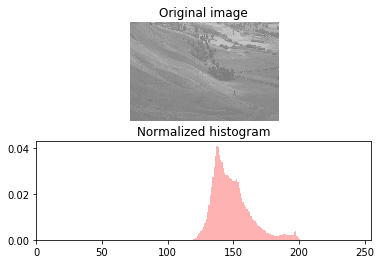

In [51]:
'''
Extracting a histogram from a grayscale image
For grayscale images, various image processing algorithms use an image histogram. Recall that an image is 
a two-dimensional array of numerical intensities. An image histogram, then, is computed by counting the occurences
of distinct pixel intensities over all the pixels in the image.
For this exercise, you will load an unequalized low contrast image of Hawkes Bay, New Zealand (originally by
Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). You will plot the image and use 
the pixel intensity values to plot a normalized histogram of pixel intensities.
INSTRUCTIONS
100XP
Load data from the file '640px-Unequalized_Hawkes_Bay_NZ.jpg' into an array.
Display image with a color map of 'gray' in the top subplot.
Flatten image into a 1-D array using the .flatten() method.
Display a histogram of pixels in the bottom subplot.
Use histogram options bins=64, range=(0,256), and normed=True to control numerical binning and the vertical scale.
Use plotting options color='red' and alpha=0.4 to tailor the color and transparency.
'''
# Load the image into an array: image
image = plt.imread('Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=256, color='red', alpha=0.3, range=(0, 256), normed=True)

# Display the plot
plt.show()

In [58]:
# min and max of pixel density
minval, maxval = image.min(), image.max()
print('The smallest & largest pixel intensities are %d & %d.' % (minval, maxval))

The smallest & largest pixel intensities are 114 & 208.


In [59]:
#rescaling the image
rescaled = 208*(image - minval) / (maxval - minval)

print(rescaled.min(), rescaled.max())

#plt.imshow(rescaled)

#plt.axis('off')

#plt.show()

0.0 2.5531914893617023


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


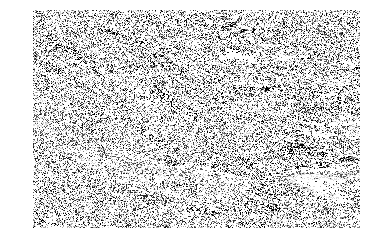

In [60]:
plt.imshow(rescaled)

plt.axis('off')

plt.show()

C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actu

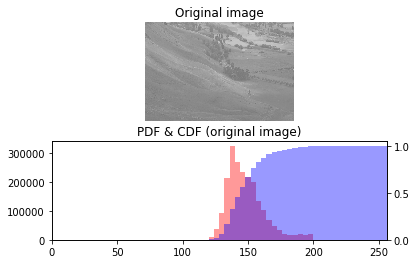

In [49]:
'''
Cumulative Distribution Function from an image histogram
A histogram of a continuous random variable is sometimes called a Probability Distribution Function (or PDF). 
The area under a PDF (a definite integral) is called a Cumulative Distribution Function (or CDF). The CDF
quantifies the probability of observing certain pixel intensities.
Your task here is to plot the PDF and CDF of pixel intensities from a grayscale image. You will use the 
grayscale image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, 
via Wikimedia Commons, CC BY 2.0). This time, the 2D array image will be pre-loaded and pre-flattened 
into the 1D array pixels for you.
The histogram option cumulative=True permits viewing the CDF instead of the PDF.
Notice that plt.grid('off') switches off distracting grid lines.
The command plt.twinx() allows two plots to be overlayed sharing the x-axis but with different scales 
on the y-axis.
INSTRUCTIONS
70XP
First, use plt.hist() to plot the histogram of the 1-D array pixels in the bottom subplot.
Use the histogram options bins=64, range=(0,256), and normed=False.
Use the plotting options alpha=0.4 and color='red' to make the overlayed plots easier to see.
Second, use plt.twinx() to overlay plots with different vertical scales on a common horizontal axis.
Third, call plt.hist() again to overlay the CDF in the bottom subplot.
Use the histogram options bins=64, range=(0,256), and normed=True.
This time, also use cumulative=True to compute and display the CDF.
Also, use alpha=0.4 and color='blue' to make the overlayed plots easier to see.
'''
# Load the image into an array: image
image = plt.imread('Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()

C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actu

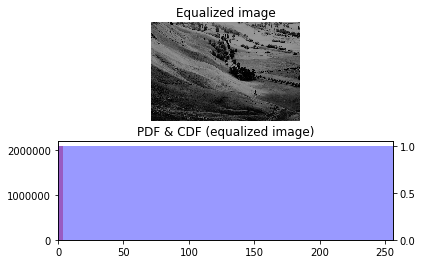

In [61]:
'''
Equalizing an image histogram
Histogram equalization is an image processing procedure that reassigns image pixel intensities. The basic idea
is to use interpolation to map the original CDF of pixel intensities to a CDF that is almost a straight line.
In essence, the pixel intensities are spread out and this has the practical effect of making a sharper,
contrast-enhanced image. This is particularly useful in astronomy and medical imaging to help us see more features.
For this exercise, you will again work with the grayscale image of Hawkes Bay, New Zealand (originally 
by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). Notice the sample code
produces the same plot as the previous exercise. Your task is to modify the code from the previous exercise 
to plot the new equalized image as well as its PDF and CDF.
The arrays image and pixels are extracted for you in advance.
The CDF of the original image is computed using plt.hist().
Notice an array new_pixels is created for you that interpolates new pixel values using the original image CDF.
INSTRUCTIONS
0XP
Use the NumPy array method .reshape() to create a 2-D array new_image from the 1-D array new_pixels.
The resulting new_image should have the same shape as image.shape.
Display new_image with a 'gray' color map to display the sharper, equalized image.
Plot the PDF of new_pixels in 'red'.
Use plt.twinx() to overlay plots with different vertical scales on a common horizontal axis.
Plot the CDF of new_pixels in 'blue'.
'''
# Load the image into an array: image
image = plt.imread('Unequalized_Hawkes_Bay_NZ.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*0.6)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
#show equalized image
plt.imshow(new_image, cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.show()

C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


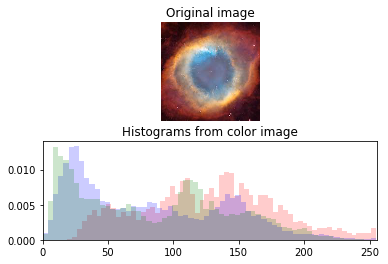

In [62]:
'''
Extracting histograms from a color image
This exercise resembles the last in that you will plot histograms from an image. This time, you will use a color
image of the Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory. The separate RGB 
(red-green-blue) channels will be extracted for you as two-dimensional arrays red, green, and blue respectively.
You will plot three overlaid color histograms on common axes (one for each channel) in a subplot as well as the 
original image in a separate subplot.
INSTRUCTIONS
70XP
Display image in the top subplot of a 2×1
2
×
1
 subplot grid. Don't use a colormap here.
Flatten the 2-D arrays red, green, and blue into 1-D arrays.
Display three histograms in the bottom subplot: one for red_pixels, one for green_pixels, and one for blue_pixels.
For each, use 64 bins and specify a translucency of alpha=0.2.
'''
# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)

# Display the plot
plt.show()

C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


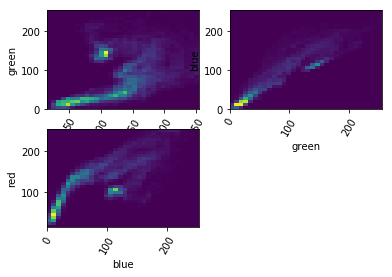

In [63]:
'''
Extracting bivariate histograms from a color image
Rather than overlaying univariate histograms of intensities in distinct channels, it is also possible to view the
joint variation of pixel intensity in two different channels.
For this final exercise, you will use the same color image of the Helix Nebula as seen by the Hubble and the Cerro
Toledo Inter-American Observatory. The separate RGB (red-green-blue) channels will be extracted for you as one-dimensional
arrays red_pixels, green_pixels, & blue_pixels respectively.
INSTRUCTIONS
100XP

Make a 2-D histogram in the top left subplot showing the joint variation of red_pixels (on the x-axis) and green_pixels 
(on the y-axis). Use bins=(32,32) to control binning.
Make a 2-D histogram in the top right subplot showing the joint variation of green_pixels (on the x-axis) and blue_pixels 
(on the y-axis). Use bins=(32,32) to control binning.
Make a 2-D histogram in the bottom left subplot showing the joint variation of blue_pixels (on the x-axis) and red_pixels
(on the y-axis). Use bins=(32,32) to control binning.
'''
# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels, bins=(32, 32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32, 32))

# Display the plot
plt.show()